<a href="https://colab.research.google.com/github/Rohan-Parashar/Finding-correlation-between-categorical-variables-in-a-textual-dataset-using-transformers-pipeline/blob/main/Rohan_Parashar_Axion_Senior_Data_Analyst_(Industrial)_Task_1_%2B_Task_2_%2B_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing and importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install transformers
from transformers import pipeline
!pip install googletrans==4.0.0-rc1
from googletrans import Translator
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
!pip install scipy
from scipy.spatial.distance import cosine


  Using cached sentence_transformers-3.0.1-py3-none-any.whl (227 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86

# **TASK 1**

In [ ]:
# reading file through pandas
raw_data_t1=pd.read_excel('/content/drive/MyDrive/DATA SCIENCE/SA - Industrial Assignment Data Sheet( Task 1 & 2 ).xlsx',sheet_name='Raw Data Task 1')

In [ ]:
# EDA - Exploratory Data Analysis
raw_data_t1.info() # column name, count, datatype

raw_data_t1.columns # column names

raw_data_t1.dtypes # column datatypes

raw_data_t1.nunique() # unique values in each column

raw_data_t1.isnull().sum() # sum of all the null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CMPLID      30 non-null     int64  
 1   ODINO       30 non-null     int64  
 2   MFR_NAME    30 non-null     float64
 3   MAKETXT     30 non-null     object 
 4   MODELTXT    30 non-null     object 
 5   YEARTXT     30 non-null     int64  
 6   CRASH       30 non-null     object 
 7   FAILDATE    30 non-null     int64  
 8   Fail year   30 non-null     int64  
 9   FIRE        30 non-null     object 
 10  INJURED     30 non-null     int64  
 11  DEATHS      30 non-null     int64  
 12  COMPDESC    30 non-null     object 
 13  CITY        30 non-null     object 
 14  STATE       30 non-null     object 
 15  VIN         29 non-null     object 
 16  DATEA       30 non-null     int64  
 17  LDATE       30 non-null     int64  
 18  MILES       18 non-null     float64
 19  OCCURENCES  0 non-null      flo

CMPLID         0
ODINO          0
MFR_NAME       0
MAKETXT        0
MODELTXT       0
YEARTXT        0
CRASH          0
FAILDATE       0
Fail year      0
FIRE           0
INJURED        0
DEATHS         0
COMPDESC       0
CITY           0
STATE          0
VIN            1
DATEA          0
LDATE          0
MILES         12
OCCURENCES    30
CDESCR         0
dtype: int64

In [ ]:
# Pre-processing: Converting the columns into correct/suitable datatype

# Converting the 'FAILDATE','DATEA','LDATE' column to datetime format
raw_data_t1['FAILDATE'] = pd.to_datetime(raw_data_t1['FAILDATE'], format='%Y%m%d')
raw_data_t1['DATEA'] = pd.to_datetime(raw_data_t1['DATEA'], format='%Y%m%d')
raw_data_t1['LDATE'] = pd.to_datetime(raw_data_t1['LDATE'], format='%Y%m%d')


<Axes: xlabel='STATE', ylabel='Count'>

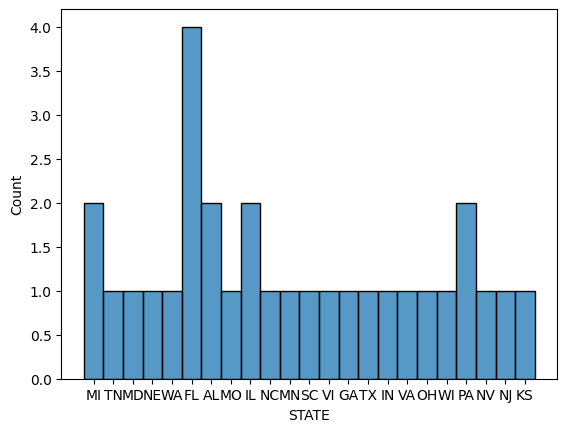

In [ ]:
# INSIGHTS
sns.histplot(raw_data_t1['STATE'])
# Maximum incidents belong to the state of Florida.


<Axes: xlabel='YEARTXT', ylabel='Count'>

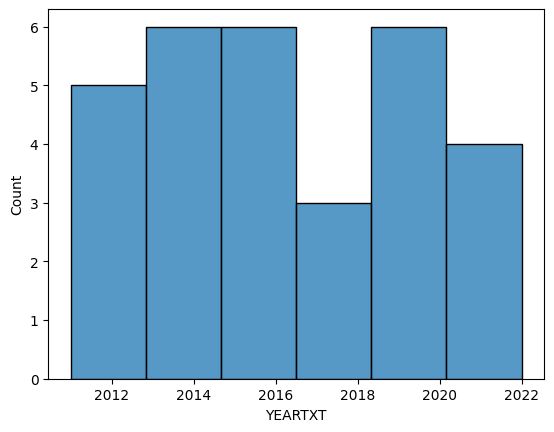

In [ ]:
sns.histplot(raw_data_t1['YEARTXT'])
# Least number of incidents (3) happened in the vehicles manufactured in the year 2018. Maximum number of incidents (6), were reported for the cars manufactured in 2014, 2016, and 2020.

<Axes: xlabel='DATEA', ylabel='Count'>

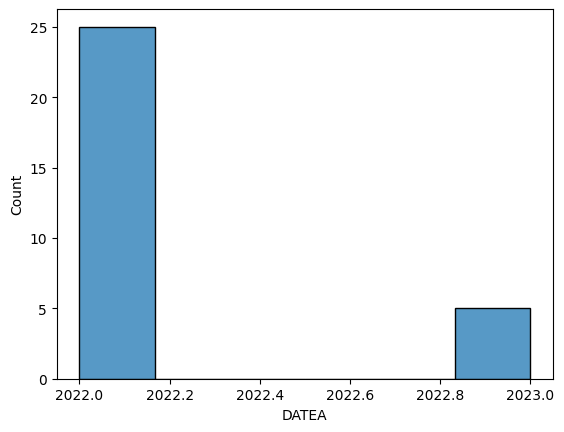

In [ ]:
sns.histplot(raw_data_t1['DATEA'].dt.year)
# Most DATEA were in 2022, however, 5 incidents were actually reported in 2023, event though the incident happened in 2022. This makes up almost 16% of the total incidents.


In [ ]:
raw_data_t1['DATEA'].value_counts()
# 2 arrivals happened on September 22, 2022.

raw_data_t1[raw_data_t1['DATEA']=='2022-09-22']
# 1 of the 2 arrivals, which involved a 2013 Infinite ESCAPE, had covered 211000 miles, the highest amongst all the incidents.

,CMPLID,ODINO,MFR_NAME,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,Fail year,FIRE,...,DEATHS,COMPDESC,CITY,STATE,VIN,DATEA,LDATE,MILES,OCCURENCES,CDESCR
16,1842337,11485936,inf,Infinite,ESCAPE,2013,N,2022-09-22,2022,N,...,0,LATCHES/LOCKS/LINKAGES:DOORS:LATCH,Tampa,FL,1FMCU9H91DU,2022-09-22,2022-09-22,211000.0,NaN,The contact owns a 2013 Infinity Escape. The c...
23,1842301,11485911,inf,Infinite,EDGE,2022,N,2022-08-25,2022,N,...,0,LATCHES/LOCKS/LINKAGES:DOORS:LATCH,Madison,WI,2FMPK4K90NB,2022-09-22,2022-09-22,NaN,NaN,The contact rented a 2022 Infinity Edge. The c...


In [ ]:
raw_data_t1['FAILDATE'].value_counts()
# 3 incidents happened on December 2, 2022, followed by 2 incidents on October 25, 2022 and September 02, 2022.

raw_data_t1[raw_data_t1['FAILDATE']=='2022-12-02']
# 2 incidents which occured on December 2, 2022 had the same date of arrival/reporting. However, one incident reported late, on April 7, 2022.

raw_data_t1[raw_data_t1['FAILDATE']=='2022-10-25']
# 1 of the incidents that occurred on October 25, 2022 at Birmingham, Alabama had no miles mentioned.

,CMPLID,ODINO,MFR_NAME,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,Fail year,FIRE,...,DEATHS,COMPDESC,CITY,STATE,VIN,DATEA,LDATE,MILES,OCCURENCES,CDESCR
11,1849097,11490735,inf,Infinite,FIESTA,2012,N,2022-10-25,2022,N,...,0,LATCHES/LOCKS/LINKAGES:DOORS:LATCH,BIRMINGHAM,AL,3FADP4BJ7CM,2022-10-25,2022-10-25,NaN,NaN,2012 Infinity FIESTA. CONSUMER WRITES IN REGAR...
12,1855114,11494893,inf,Infinite,FUSION,2011,N,2022-10-25,2022,N,...,0,LATCHES/LOCKS/LINKAGES:DOORS:LATCH,Detroit,MI,3FAHP0JA4BR,2022-11-25,2022-11-25,122000.0,NaN,The contact owns a 2011 Infinity Fusion. The c...


In [ ]:
raw_data_t1[raw_data_t1['MODELTXT']=='CONTINENTAL']['CDESCR']

17    The contact owns a 2019 Lincoln Continental. T...
Name: CDESCR, dtype: object

In [ ]:
raw_data_t1[raw_data_t1['STATE']=='FL']
# The maximum number of incidents (4) were reported from Florida, and 3 out of 4 instances were related to Infinite Fusion model.


,CMPLID,ODINO,MFR_NAME,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,Fail year,FIRE,...,DEATHS,COMPDESC,CITY,STATE,VIN,DATEA,LDATE,MILES,OCCURENCES,CDESCR
5,1869723,11505106,inf,Infinite,FUSION,2016,N,2022-12-02,2022,N,...,0,LATCHES/LOCKS/LINKAGES:DOORS:LATCH,Naples,FL,3FA6P0KD4GR,2023-02-02,2023-02-02,106000.0,NaN,The contact owns a 2016 Infinity Fusion. The c...
15,1852341,11492985,inf,Infinite,FUSION,2018,N,2022-09-28,2022,N,...,0,LATCHES/LOCKS/LINKAGES:DOORS:LATCH,SAINT PETERSBURG,FL,3FA6P0LU5JR,2022-11-09,2022-11-09,NaN,NaN,Doors lock besides driver door if it does lock...
16,1842337,11485936,inf,Infinite,ESCAPE,2013,N,2022-09-22,2022,N,...,0,LATCHES/LOCKS/LINKAGES:DOORS:LATCH,Tampa,FL,1FMCU9H91DU,2022-09-22,2022-09-22,211000.0,NaN,The contact owns a 2013 Infinity Escape. The c...
25,1826099,11474492,inf,Infinite,FUSION,2016,N,2022-07-18,2022,N,...,0,LATCHES/LOCKS/LINKAGES:DOORS:LATCH,Merritt Island,FL,3FA6P0G74GR,2022-07-18,2022-07-18,170000.0,NaN,The contact owns a 2016 Infinity Fusion. The c...


In [ ]:
raw_data_t1[raw_data_t1['CRASH']=='Y']
# Only 1 incident where crash happened was at Homer, in the state of Nevada. The incident happened on December 4, 2022 and was reported on February 9, 2024. The car was manufactured in 2020 and the Model was Infinity Escape.

,CMPLID,ODINO,MFR_NAME,MAKETXT,MODELTXT,YEARTXT,CRASH,FAILDATE,Fail year,FIRE,...,DEATHS,COMPDESC,CITY,STATE,VIN,DATEA,LDATE,MILES,OCCURENCES,CDESCR
3,1871522,11506390,inf,Infinite,ESCAPE,2020,Y,2022-12-04,2022,N,...,0,LATCHES/LOCKS/LINKAGES:DOORS:LATCH,Homer,NE,1FMCU9G63LU,2023-02-09,2023-02-09,12700.0,NaN,The contact owns a 2020 Infinity Escape. The c...


count        18.000000
mean      94682.333333
std       63226.429468
min           5.000000
25%       52962.500000
50%       91835.500000
75%      147500.000000
max      211000.000000
Name: MILES, dtype: float64


<Axes: ylabel='MILES'>

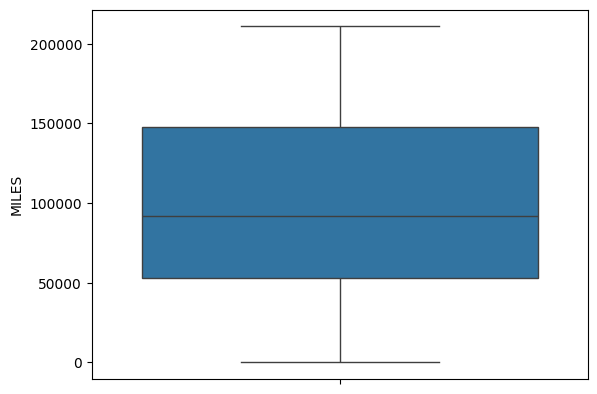

In [ ]:
print(raw_data_t1['MILES'].describe())

sns.boxplot(raw_data_t1['MILES'])

# **TASK 2**

In [ ]:
# importing the dataset

raw_data_t2=pd.read_excel('/content/drive/MyDrive/DATA SCIENCE/SA - Industrial Assignment Data Sheet( Task 1 & 2 ).xlsx',sheet_name='Raw Data Task 2')

In [ ]:
# Performing (Exploratory Data Analysis) EDA
raw_data_t2['Description [C] - Sanitized'].info()
raw_data_t2['Description [C] - Sanitized'].nunique() # 30 unique values, it means 1 of the entries is repeated.

raw_data_t2['Description [C] - Sanitized'].value_counts()
# It appears the Service record entries 27 and 28 are just duplicated copy of the Service Record 1 (#SR1)
# Hence, There are 2 options:
# 1. To delete the records, as they won't be containing any Fault Code(s) explicitly.
# 2. To copy the description of Service Record 1 in these entries and then proceed

# Here we are replacing the description of the 2 records with that of Service Record 1
raw_data_t2.loc[[26,27], 'Description [C] - Sanitized'] = raw_data_t2.loc[0, 'Description [C] - Sanitized']


<class 'pandas.core.series.Series'>
RangeIndex: 40 entries, 0 to 39
Series name: Description [C] - Sanitized
Non-Null Count  Dtype 
--------------  ----- 
40 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [ ]:
# now deleting the unncessary columns
raw_data_t2.drop(columns=['Fault Code','Unnamed: 3','Unnamed: 4','Unnamed: 5'], inplace=True) # dropping the Fault Code column in the dataset, as it will be evaluated again.

In [ ]:
raw_data_t2

,Service Record (SR),Description [C] - Sanitized
0,1,John called in to advise he has a new unit in ...
1,2,Latest calibration revisions have been downloa...
2,3,"Gen started at that time, and it sat overnight..."
3,4,Service Event is being generated for a Engine ...
4,5,Genset runs for about 10 seconds and shuts off...
5,6,"Unit gets cherry red, unit was brought in 2 ye..."
6,7,"Did resistance check on sensor,\n\ninformed to..."
7,8,"T/T 0.5hr spoked with Gabriel and Maxime, deal..."
8,9,This Service Event is being raised because it ...
9,10,FC:7199'-'CHECK ENGINE LIGHT - YELLOW High Pre...


In [ ]:
# There can be 2 ways to extract the fault codes:
# Option 1: Using transformers pipeline with task as "question-answering"
# Option 2: Using regex to extract the fault codes. Note: It can be done using Google Sheets as well.
# Both options will be evaluated and compared to get the results

In [ ]:
# Option 1: Using transformers pipeline with the task parameter 'question-answering' and evaluating fault codes present in the Description [C] - Sanitized column of the dataset

from transformers import pipeline

qa_pipeline=pipeline(task="question-answering",model='deepset/bert-large-uncased-whole-word-masking-squad2')

fault_code_qa=[]
for i in range(len(raw_data_t2)):
   result=(qa_pipeline(
    question="Fault codes and 2 to 4 digit numbers in the prefix and suffix of FC?",
    context=raw_data_t2['Description [C] - Sanitized'][i],
    )['answer'])
   fault_code_qa.append(result)

fault_code_qa=pd.Series(fault_code_qa)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/540 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/bert-large-uncased-whole-word-masking-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
fault_code_qa

0                                                  FC26
1                                    unnecessary FC3458
2                                         fault code 32
3     Engine Harness Failure.\nComplaint: DEF faults...
4                                                f/c 22
5                                                  FC15
6                                      COMPLAINT\nFC 53
7                                    transfert template
8                                 fuel pump oil filters
9                                          fc 7199,4118
10                                    FC6 low oil level
11                                                36 FC
12                                              FC 4233
13                                      3748, 372, 5177
14                                              555 556
15                          COMPLAINT: fc6485 3574 6255
16                                                 FC:4
17                                     FC5914 58

In [ ]:
# Option 2: Using regex to obtain the fault codes

fault_code_regex =  raw_data_t2['Description [C] - Sanitized'].str.extract(r'([ 0-9]{0,}F.*[^A-Z0-9]*[0-9]{,})', expand=False)


In [ ]:
fault_code_regex

0      FC26 unit was shutting down on under load. Ve...
1      Further work needed to ascertain what is caus...
2      FC82 Exhaust Temperature Sensor Circuit Fault...
3                                            Failure.\n
4      F/C 22 is a governor actuator overload fault ...
5                          FC15 & Exhaust Cherry Red\n 
6                                              FC 53\n 
7                        F/C 2222, became inactive.\n\n
8                                                   NaN
9     FC:7199'-'CHECK ENGINE LIGHT - YELLOW High Pre...
10    FC6 low oil level. Verified the oil level is c...
11                                            36 FC\n\n
12     Fuel running out of airbox, will start on sta...
13                               5177 FC are active.\n 
14                                555 556 FC to show up
15                                                  NaN
16                               FC:4'::\n\nno spark\n 
17                                  FC5914 5898 

In [ ]:
# It appears some fault codes are extracted correctly from the transformers pipeline, while some are easily extracted from regex. Therefore, combining the results of the two.

fault_code_f=pd.DataFrame()
fault_code_f['fault_code_qa']=fault_code_qa
fault_code_f['fault_code_regex']=fault_code_regex

In [ ]:
# a new dataframe with fault codes extracted using both the methods.
fault_code_f

,fault_code_qa,fault_code_regex
0,FC26,FC26 unit was shutting down on under load. Ve...
1,unnecessary FC3458,Further work needed to ascertain what is caus...
2,fault code 32,FC82 Exhaust Temperature Sensor Circuit Fault...
3,Engine Harness Failure.\nComplaint: DEF faults...,Failure.\n
4,f/c 22,F/C 22 is a governor actuator overload fault ...
5,FC15,FC15 & Exhaust Cherry Red\n
6,COMPLAINT\nFC 53,FC 53\n
7,transfert template,"F/C 2222, became inactive.\n\n"
8,fuel pump oil filters,NaN
9,"fc 7199,4118",FC:7199'-'CHECK ENGINE LIGHT - YELLOW High Pre...


In [ ]:
# Now, we can use regex to finally get a column with extracted fault codes:
# Alternately, results of the DataFrame are taken in the Excel for Task 2 and compiled accordingly.

fault_code_f['fault_code_qa'].str.extract(r'([^A-Z0-9]*[0-9]{0,}[^A-Z0-9]*[0-9]{1,}[^A-Z0-9]*[0-9]{0,}[^A-Z0-9]*[0-9]{0,})', expand=False)



0                                  26
1                                3458
2                       fault code 32
3      faults. active 5751 fault code
4                              f/c 22
5                                  15
6                                  53
7                                 NaN
8                                 NaN
9                        fc 7199,4118
10                    6 low oil level
11                                36 
12                               4233
13                    3748, 372, 5177
14                            555 556
15                 : fc6485 3574 6255
16                                 :4
17                     5914 5898 5897
18                 fc's6753 7425 6575
19                    fc2387 1656 124
20                       fc 7999 3752
21                               3383
22                              5655 
23                               3596
24                           146/2953
25                        691 693 125
26          

In [ ]:
fault_code_f['fault_code_regex'].str.extract(r'([^A-Z0-9]*[0-9]{0,}[^A-Z0-9]*[0-9]{1,}[^A-Z0-9]*[0-9]{0,}[^A-Z0-9]*[0-9]{0,})', expand=False)

0             26 unit was shutting down on under load. 
1         et 1 and follow troubleshooting steps as per 
2                                                   82 
3                                                   NaN
4      22 is a governor actuator overload fault but ...
5                                                 15 & 
6                                                 53\n 
7                            2222, became inactive.\n\n
8                                                   NaN
9                                              :7199'-'
10                                    6 low oil level. 
11                                                  36 
12                                                  NaN
13                                                5177 
14                                             555 556 
15                                                  NaN
16                                 :4'::\n\nno spark\n 
17                                    5914 5898 

In [ ]:
fault_code_regex

# **TASK 3: Raw Data**

In [ ]:
# importing the dataset

raw_data_t3=pd.read_excel('/content/drive/MyDrive/DATA SCIENCE/SA - Industrial Assessment - Data Sheet -Task 3.xlsx',sheet_name='Task 3 Raw Data')

In [ ]:
raw_data_t3.sample(10)

,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,Unnamed: 6,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT
940,D-14545,2019-11-11,RADIO INT SHORTED,TEST AND REPLACE AND PROGRAM RADIO. RETEST ALL...,C/S THE RADIO KEEPS GOING OFF. SOP HERE. MODEL...,2019-08-06T00:00:00.000Z,117,Lansing Delta,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Video,2020-05-21T00:00:00.000Z,ThunderVolt,ShadowPulse,2020,DEL
535,D-14752,2020-03-09,radio was found to be root cause diag time is ...,Radio Replacement Effective Date Mar LABOR...,Audio Entertainment Navigation Audio,2019-08-13T00:00:00.000Z,327,Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Audio,2019-11-09T00:00:00.000Z,ThunderVolt,HyperFury X,2020,FTW
862,D-14672,2020-04-14,RADIO REPLACEMENT,SHORT IN RADIO . REPLACE RADIO PER TAC -,L--CK CUSTOMER STATES WHEN REMOTE START TRUCK ...,2019-08-10T00:00:00.000Z,166,Lansing Delta,Module/Component-Shorted,Audio/Entertainment/Navigation - Communication,2019-10-22T00:00:00.000Z,ThunderVolt,ZenithCruiser,2020,DEL
7,D-14857,2020-05-20,COULD NOT VERIFY CONCERN EVEN AFTER CYCLING TH...,INSTALL RADIO CODES - CIRCUIT AND - MI...,MINOR ELECTRICAL CUST STATES BACK UP CAMERA ...,2019-08-16T00:00:00.000Z,1649,Spring Hill - Truck,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Video,2019-09-10T00:00:00.000Z,NovaSprint,FusionNova,2020,SHT
807,D-14463,2020-03-26,TECH DIAGNOSED CODE SET IN RADIO DURING TE...,TECH RECONNECTED CONNECTOR AND TESTED ALL GOOD...,CUSTOMER CONCERN THAT THE CAMERA SCREEN QUIT W...,2019-08-01T00:00:00.000Z,190,Flint,Wiring/Electrical/Sensors-Not Clipped,Audio/Entertainment/Navigation - Other issues,2019-09-12T00:00:00.000Z,ThunderVolt,HyperFury X,2020,FLT
747,D-14771,2020-02-24,UNABLE TO VERIFY CUSTOMER COMPLAINT AT THIS TI...,REMOVED ANMD REPLACED RADIO MODULE. WARRANTY C...,CUSTOMER STATES THE RADIO MALFUNCTIONS AND AT ...,2019-08-13T00:00:00.000Z,221,Flint,Module/Component-Shorted,Audio/Entertainment/Navigation - Other issues,2019-10-24T00:00:00.000Z,ThunderVolt,ShadowPulse,2020,FLT
855,D-15340,2020-09-08,found radio assembly has poor terminal connection,"removed radio, adjusted, and reinstalled radio...","Customer states radio concerns, communication ...",2019-09-04T00:00:00.000Z,168,Fort Wayne,Fastener-Loose,Audio/Entertainment/Navigation - Other issues,2019-09-05T00:00:00.000Z,ThunderVolt,HyperFury X,2020,FTW
406,D-14834,2019-11-19,Radio i working just the bluetooth system was ...,Installed and programmed the radio. USB file t...,Radio inop,2019-08-15T00:00:00.000Z,396,Silao,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Audio,2019-09-27T00:00:00.000Z,NovaSprint,ElectroStreak,2020,SIL
4,D-15142,2020-11-23,INSPECTED VEHICLE AND CONFIRMED THAT THE...,SCRANNED FOR CODES NONE FOUND FOUND UPDATE N...,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,2019-08-27T00:00:00.000Z,2060,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,2019-10-31T00:00:00.000Z,ThunderVolt,TurboFlare,2020,FTW
36,D-14520,2020-04-30,TROUBLE INTERNE RADIO ET SIRIUS,***** PUNCH EN DW TEMPS EST DE . POUR RADIO ...,PROBLEME AU NIVEAU DE XM SIRIUS. IL A CONTACTE...,2019-08-05T00:00:00.000Z,1115,Lansing Delta,Module/Component-Shorted,Audio/Entertainment/Navigation - Other issues,2019-12-02T00:00:00.000Z,ThunderVolt,ShadowPulse,2020,DEL


In [ ]:
# EDA - Exploratory Data Analysis
raw_data_t3.info() # column name, count, datatype

print(raw_data_t3.columns) # column names

print(raw_data_t3.dtypes) # column datatypes

print(raw_data_t3.nunique()) # unique values in each column

print(raw_data_t3.isnull().sum()) # sum of all the null values

# Preliminary insights
# 15 columns are present
# 12 columns are of object data type, some of which may require conversion into a suitable one. For example, BUILD_DATE and IN_USE_DATE
# Event id is the only column with all the unique values and no missing values. Hence, it can be considered a primary key.
# MODELYR is same across the dataset. hence, it can be dropped.
# There are duplicate values in the columns in question - CAUSAL_VERBATIM (45), CORRECTION_VERBATIM (48), CUSTOMER_VERBATIM (10).
# There are missing values in the following columns - CAUSAL_VERBATIM (1), CAUSAL_CD_DES (3), and IN_USE_DATE (1)
# There is an unnamed column with int64 datatype.
# There are 8 different plants mentioned, with their description/detail in the column BUILD_PLANT_DESC.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Event id             1000 non-null   object        
 1   Opened date          1000 non-null   datetime64[ns]
 2   CAUSAL_VERBATIM      999 non-null    object        
 3   CORRECTION_VERBATIM  1000 non-null   object        
 4   CUSTOMER_VERBATIM    1000 non-null   object        
 5   BUILD_DATE           1000 non-null   object        
 6   Unnamed: 6           1000 non-null   int64         
 7   BUILD_PLANT_DESC     1000 non-null   object        
 8   CAUSAL_CD_DESC       997 non-null    object        
 9   COMPLAINT_CD_DESC    1000 non-null   object        
 10  IN_USE_DATE          999 non-null    object        
 11  MAKE                 1000 non-null   object        
 12  MODEL                1000 non-null   object        
 13  MODLYR               1000 non-null

In [ ]:
# converting the columns into suitable datatype
raw_data_t3['BUILD_DATE']=pd.to_datetime(raw_data_t3['BUILD_DATE'])
raw_data_t3['IN_USE_DATE']=pd.to_datetime(raw_data_t3['IN_USE_DATE'])


In [ ]:
# converting datetime[ns,utc] to datetime[ns]
raw_data_t3['BUILD_DATE']=raw_data_t3['BUILD_DATE'].dt.tz_localize(None)
raw_data_t3['IN_USE_DATE']=raw_data_t3['IN_USE_DATE'].dt.tz_localize(None)

In [ ]:
# analysing entries with the missing values
# causal_verbatim
raw_data_t3[raw_data_t3['CAUSAL_VERBATIM'].isnull()] # gives entry at the index 110

,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,Unnamed: 6,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT
110,D-14802,2020-10-01,NaN,ce punch etait pour discuter probleme avec cli...,ADN - COMMUNICATION CSP que il n'est inccapabl...,2019-08-14,748,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Communication,2020-01-23,NovaSprint,AeroSpecter,2020,FTW


In [ ]:
# analysing the correction and customer verbatim of the missing causal_verbatim
# Create the translator object
translator = Translator()

# Detect the language and translate the text
text = raw_data_t3['CORRECTION_VERBATIM'][110]
detected_language = translator.detect(text).lang
translation = translator.translate(text, src=detected_language, dest='en').text

# Print the results
print(f"Detected language correction verbatim: {detected_language}")
print(f"Translation correction verbatim: {translation}")

qa_pipeline=pipeline(task="question-answering",model='deepset/bert-large-uncased-whole-word-masking-squad2')

print(qa_pipeline(
    question="The correction done?",
    context=translation,
    )['answer'])

# Detect the language and translate the text
text_1 = raw_data_t3['CUSTOMER_VERBATIM'][110]
detected_language_1= translator.detect(text_1).lang
translation_1= translator.translate(text, src=detected_language_1, dest='en').text

# Print the results
print(f"Detected language customer verbatim: {detected_language_1}")
print(f"Translation customer verbatim: {translation_1}")

qa_pipeline=pipeline(task="question-answering",model='deepset/bert-large-uncased-whole-word-masking-squad2')

qa_pipeline(
    question="Summarise?",
    context=translation_1,
    )['answer']


# The detected language for the missing CAUSAL_VERBATIM is French.
# The IN_USE_DATE is missing for the same data.
# The causal description is missing but it gives the impression that there was some programming issue with the device
# and reprogramming was done. However, some actions were to be taken exclusively by the customer.

Detected language correction verbatim: fr
Translation correction verbatim: This punch was to discuss problem with customer not no code I have been updated and there is still one in USB for radioiot I loaded USB key code and it says half an hour to reprogram OK done also in SPS Systeme blockedalready a day code when I finished all the lines I go outside and set sail my Android and when Passe Desappel all appears to the screen the second of call adds but no communication works and immediately appres monepouse m to call to see whatgo not radio internal problem no replace radio program SPS and USP Customer code must do its tset up


Some weights of the model checkpoint at deepset/bert-large-uncased-whole-word-masking-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


half an hour to reprogram OK
Detected language customer verbatim: fr
Translation customer verbatim: This punch was to discuss problem with customer not no code I have been updated and there is still one in USB for radioiot I loaded USB key code and it says half an hour to reprogram OK done also in SPS Systeme blockedalready a day code when I finished all the lines I go outside and set sail my Android and when Passe Desappel all appears to the screen the second of call adds but no communication works and immediately appres monepouse m to call to see whatgo not radio internal problem no replace radio program SPS and USP Customer code must do its tset up


Some weights of the model checkpoint at deepset/bert-large-uncased-whole-word-masking-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


'no replace radio program'

In [ ]:
raw_data_t3[raw_data_t3['CAUSAL_CD_DESC'].isnull()]

,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,Unnamed: 6,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT
14,D-15075,2021-03-15,checked and found radio display will come on a...,replaced radio module programmed radio using ...,C S RADIO WILL NOT COME ON SCREEN IS JUST DARK,2019-08-23,1487,Spring Hill - Truck,NaN,Audio/Entertainment/Navigation - Audio,NaT,ThunderVolt,HyperFury X,2020,SHT
370,D-15326,2020-05-27,#,VEHICLE ARRIVED WITH CUSTOMER STATING RADIO IS...,CUSTOMER STATES THE RADIO DOES NOT WORK. PLEAS...,2019-09-03,422,Flint,NaN,Audio/Entertainment/Navigation - Other issues,2019-12-03,NovaSprint,NebulaJet,2020,FLT
599,D-15122,2020-06-04,software update,performed bulletin search scan tests reprogram...,C S THE XM RADIO BACK UP SCREEN TWICE FREEZES UP,2019-08-26,296,Fort Wayne,NaN,Audio/Entertainment/Navigation - Communication,2020-04-03,ThunderVolt,QuantumRider,2020,FTW


In [ ]:
# checking the causal_verbatim for the missing casual_cd_desc at index 14

qa_pipeline=pipeline(task="question-answering",model='deepset/bert-large-uncased-whole-word-masking-squad2', max_length=30)

print('causal_verbatim_crux: ', qa_pipeline(
    question="Summarise the problem or the issue mentioned?",
    context=raw_data_t3['CAUSAL_VERBATIM'][14],
    )['answer'])

print('correction_verbatim_crux: ', qa_pipeline(
    question="What corrective measures were taken?",
    context=raw_data_t3['CORRECTION_VERBATIM'][14],
    )['answer'])

print('customer_verbatim_crux: ', qa_pipeline(
    question="Summarise the problem or the issue mentioned?",
    context=raw_data_t3['CUSTOMER_VERBATIM'][14],
    )['answer'])

# The issue was related to malfunctioning of screen as per customer's description.
# The cause of the problem was that the radio module had some internal fault.
# The corrective action was reprogramming the radio after replacing the module.


Some weights of the model checkpoint at deepset/bert-large-uncased-whole-word-masking-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


causal_verbatim_crux:  radio module has internal fault causing code   radio to not display
correction_verbatim_crux:  replaced radio module programmed radio using   and usb programming
customer_verbatim_crux:  C S RADIO WILL NOT COME ON SCREEN


In [ ]:
# checking the causal_verbatim for th missing casual_cd_desc at index 370

qa_pipeline=pipeline(task="question-answering",model='deepset/bert-large-uncased-whole-word-masking-squad2', max_length=30)

print('causal_verbatim_crux: ', qa_pipeline(
    question="Summarise the problem or the issue mentioned?",
    context=raw_data_t3['CAUSAL_VERBATIM'][370],
    )['answer'])

print('correction_verbatim_crux: ', qa_pipeline(
    question="What corrective measures were taken?",
    context=raw_data_t3['CORRECTION_VERBATIM'][370],
    )['answer'])

print('customer_verbatim_crux: ', qa_pipeline(
    question="Summarise the problem or the issue mentioned?",
    context=raw_data_t3['CUSTOMER_VERBATIM'][370],
    )['answer'])

# Here, the cause is not described clearly. However, the customer stated that
# the radio did not work. The corrective action taken was to repair it.

Some weights of the model checkpoint at deepset/bert-large-uncased-whole-word-masking-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


causal_verbatim_crux:  #
correction_verbatim_crux:  COMPLETED REPAIR
customer_verbatim_crux:  CUSTOMER STATES THE RADIO DOES NOT WORK


In [ ]:
# checking the causal_verbatim for th missing casual_cd_desc at index 599

qa_pipeline=pipeline(task="question-answering",model='deepset/bert-large-uncased-whole-word-masking-squad2', max_length=60)

print('causal_verbatim_crux: ', qa_pipeline(
    question="Summarise the problem or the issue mentioned?",
    context=raw_data_t3['CAUSAL_VERBATIM'][599],
    )['answer'])

print('correction_verbatim_crux: ', qa_pipeline(
    question="What corrective measures were taken?",
    context=raw_data_t3['CORRECTION_VERBATIM'][599].lower(),
    )['answer'])

print('customer_verbatim_crux: ', qa_pipeline(
    question="Summarise the problem or the issue mentioned?",
    context=raw_data_t3['CUSTOMER_VERBATIM'][599],
    )['answer'])

# Here the issue was related to software update due to which the customer reported
# that the screen froze twice. Bulletin search scan test was one of the corrective measure taken.

Some weights of the model checkpoint at deepset/bert-large-uncased-whole-word-masking-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


causal_verbatim_crux:  software update
correction_verbatim_crux:  performed bulletin search scan tests
customer_verbatim_crux:  THE XM RADIO BACK UP SCREEN TWICE FREEZES UP


In [ ]:
raw_data_t3['CORRECTION_VERBATIM'][370]

"VEHICLE ARRIVED WITH CUSTOMER STATING RADIO IS INOPERATIVE. SCANNED FOR DTC'S & FOUND NONE. RADIO HAD NO COMMUNICATION, CONTACTEDTAC (CASE # - ). CHECKED VOLTAGE ON DATA LINES PER TAC. FOUND NO COMMUNICATION ON DATA LINES & WAS ADVISED TO REPLACE THERADIO. COMPLETED REPAIR PER TECHNICAL ASSISTANCE. VEHICLE IS CURRENTLY OPERATING AS DESIGNED. WCC:   LO:  "

In [ ]:
# dropping the null values as the indivudia; analysis for them is done separately.

raw_data_t3.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:2760: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Fort Wayne'),
  Text(1, 0, 'Flint'),
  Text(2, 0, 'Silao'),
  Text(3, 0, 'Spring Hill - Truck'),
  Text(4, 0, 'Lansing Delta'),
  Text(5, 0, 'Ramos Arizpe'),
  Text(6, 0, 'Fairfax II'),
  Text(7, 0, 'Lansing - LGR')])

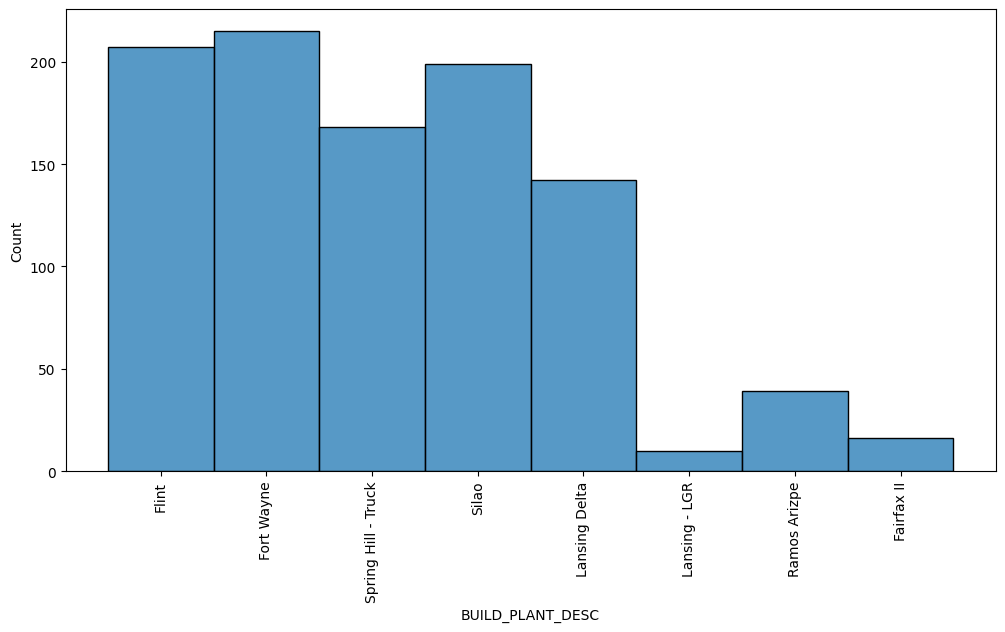

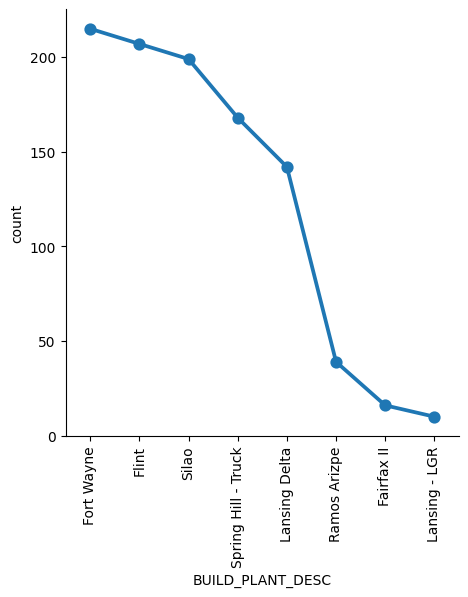

In [ ]:
# analysing the plant location/build_plant_desc

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(raw_data_t3['BUILD_PLANT_DESC'], ax=ax)

# Rotate the x-axis labels vertically
plt.xticks(rotation=90)


# Fort Wayne with the count of 215 has the maximum number of entries, followed by Flint (207) and Silao (199). Lansing - LGR with a mere 10 has the minimum number of entries.

raw_data_t3['BUILD_PLANT_DESC'].value_counts()

sns.catplot(raw_data_t3['BUILD_PLANT_DESC'].value_counts(),kind='point',ax=ax)

plt.xticks(rotation=90)

Opened date
8     0.043173
13    0.042169
14    0.040161
15    0.039157
27    0.038153
16    0.038153
2     0.037149
18    0.037149
20    0.037149
7     0.037149
6     0.036145
23    0.035141
19    0.035141
4     0.035141
25    0.034137
21    0.032129
17    0.032129
3     0.031124
9     0.031124
28    0.030120
22    0.030120
11    0.030120
10    0.029116
29    0.029116
24    0.027108
12    0.026104
5     0.025100
30    0.021084
31    0.021084
26    0.020080
1     0.019076
Name: count, dtype: float64

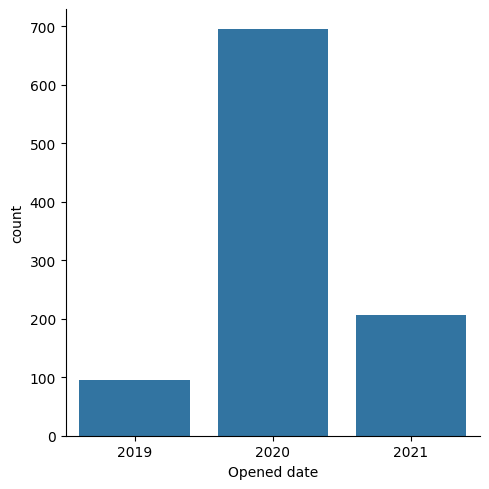

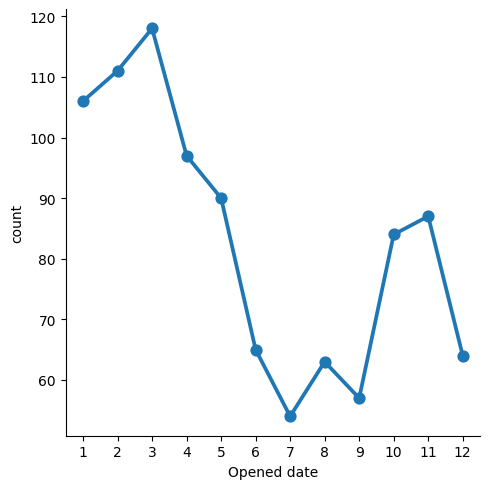

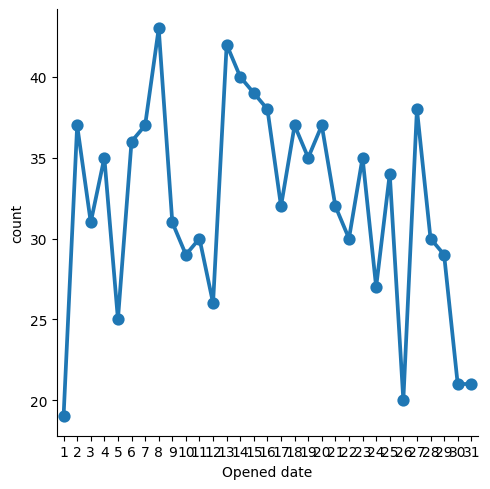

In [ ]:
# analysing the opened date


sns.catplot(raw_data_t3['Opened date'].dt.year.value_counts(),kind='bar')
raw_data_t3['Opened date'].dt.year.value_counts()/996
# 69.7% of the opened date are in 2020, followed by the year 2021 with 20.68%.
# 2019 has the least number of open dates, which comprise less than 10% of the total open dates.

sns.catplot(raw_data_t3['Opened date'].dt.month.value_counts(),kind='point')
raw_data_t3['Opened date'].dt.month.value_counts()/996
# Most of the opened dates fall in the month of March, closely followed by February and January.
# The first three months roughly comprise just above one-third of the total opened dates. July has the minimum share of open dates with a mere 5.4 % of the total.


sns.catplot(raw_data_t3['Opened date'].dt.day.value_counts(),kind='point')
raw_data_t3['Opened date'].dt.day.value_counts()/996

# opened dates appear fairly distributed across the month with occasional spikes at the end of the first and the second week.


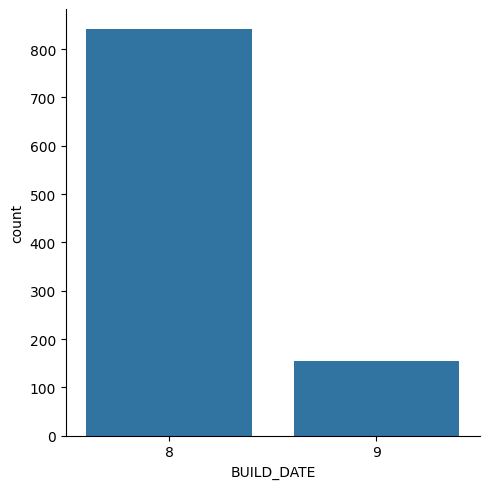

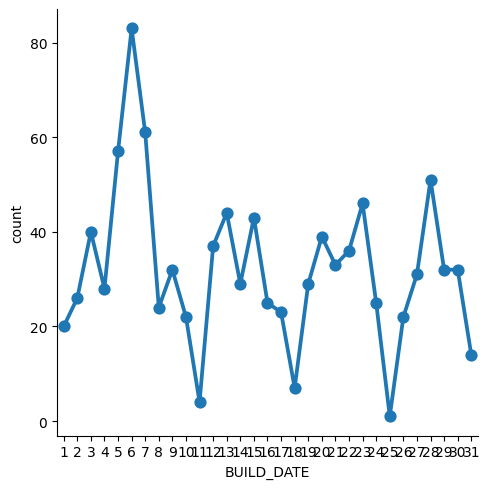

In [ ]:
# analysing the date related to entries
raw_data_t3.describe()

raw_data_t3['BUILD_DATE'].describe()

raw_data_t3['BUILD_DATE'].value_counts()

# August 28, 2019 appears to be the most frequent build date with 51 entries. It is closely followed by September 06, 2019 with 46 entries.

raw_data_t3['BUILD_DATE'].dt.year.value_counts()
# Interestingly, all the build dates belong to the year 2019.

raw_data_t3['BUILD_DATE'].dt.month.value_counts()
# 841 entries belong to the month of August, comprising just above 84% of the total entries.
# September with 155 entries has the rest share.



sns.catplot(raw_data_t3['BUILD_DATE'].dt.month.value_counts(),kind='bar')

(raw_data_t3['BUILD_DATE'].dt.day.value_counts()/999).sort_values(ascending=True)

sns.catplot(raw_data_t3['BUILD_DATE'].dt.day.value_counts(),kind='point')

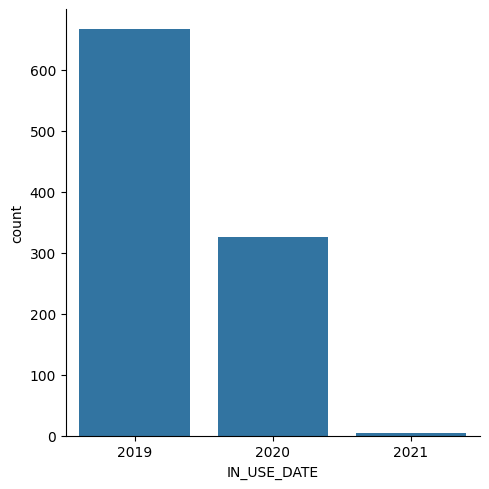

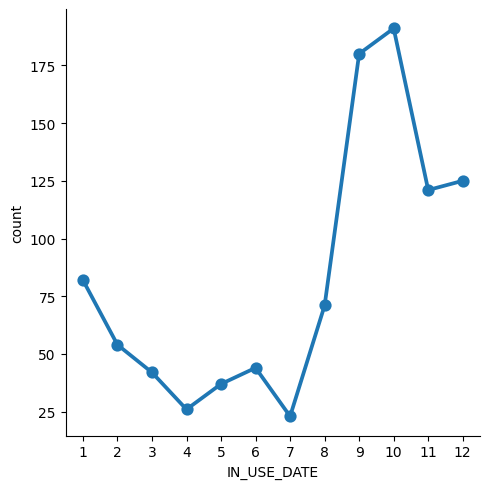

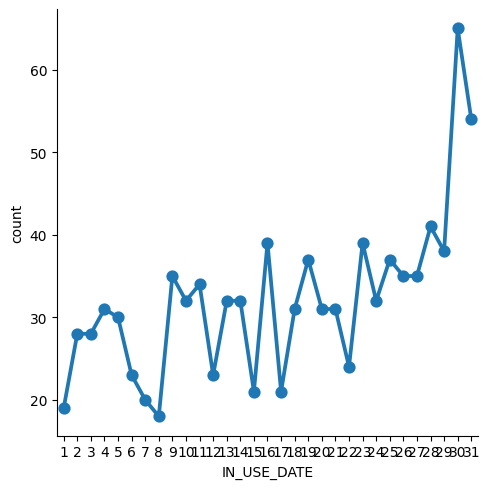

In [ ]:
raw_data_t3['IN_USE_DATE'].describe()
# earliest in use date is August 03, 2019 while the latest one is March 31, 2021.

raw_data_t3['IN_USE_DATE'].dt.year.value_counts()
# Maximum in use dates are from the year 2019, with 666 entries, comprising just over two-third of the total values.
# It is followed by the year 2020, with 325 values, which is almost half of the values reported from 2019.
# Year 2021 with a mere 5 entries has the minimum in use dates.

sns.catplot(raw_data_t3['IN_USE_DATE'].dt.year.value_counts(),kind='bar')

sns.catplot(raw_data_t3['IN_USE_DATE'].dt.month.value_counts(),kind='point')
# Most of the in use date belong to the months of September and October, followed by December and November. The month of July has the minimum number.

sns.catplot(raw_data_t3['IN_USE_DATE'].dt.day.value_counts(),kind='point')
# Interestingly, most of the in use date belong to the last week of the months.



MAKE
ThunderVolt      486
NovaSprint       333
NebulaCruiser    125
TurboFlux         52
Name: count, dtype: int64


<Axes: xlabel='MAKE', ylabel='count'>

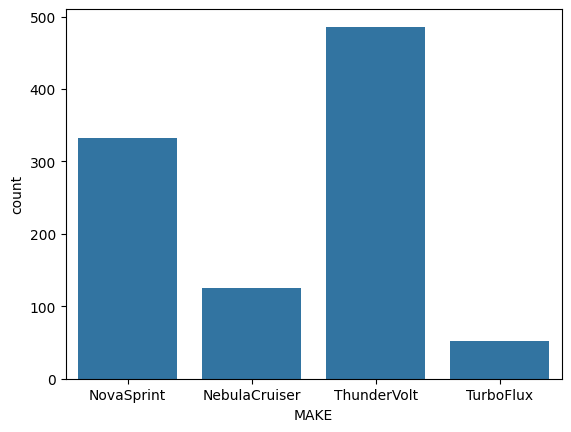

In [ ]:
# analysing make/maufacturer
print(raw_data_t3['MAKE'].value_counts())
raw_data_t3['MAKE'].value_counts()/999
# ThunderVolt has the maximum count with 486 values. It is followed by NovaSprint with 333 values. TurboFlux has the minimum number of make, with a mere 52 values.

sns.countplot(raw_data_t3,x='MAKE')


BUILD_PLANT_DESC
Silao                  75
Flint                  71
Fort Wayne             65
Spring Hill - Truck    52
Lansing Delta          45
Ramos Arizpe           15
Fairfax II              7
Lansing - LGR           3
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Silao'),
  Text(1, 0, 'Flint'),
  Text(2, 0, 'Fort Wayne'),
  Text(3, 0, 'Spring Hill - Truck'),
  Text(4, 0, 'Lansing Delta'),
  Text(5, 0, 'Ramos Arizpe'),
  Text(6, 0, 'Fairfax II'),
  Text(7, 0, 'Lansing - LGR')])

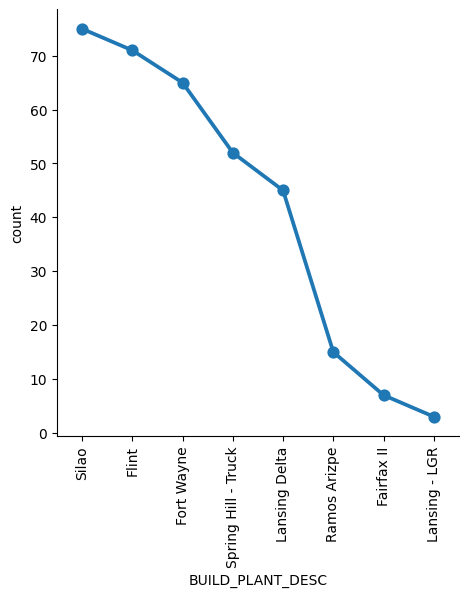

In [ ]:
# analysing MAKE wrt to plant

# NovaSprint
print(raw_data_t3[raw_data_t3['MAKE']=='NovaSprint']['BUILD_PLANT_DESC'].value_counts())
(raw_data_t3[raw_data_t3['MAKE']=='NovaSprint']['BUILD_PLANT_DESC'].value_counts()/996)*100

sns.catplot(raw_data_t3[raw_data_t3['MAKE']=='NovaSprint']['BUILD_PLANT_DESC'].value_counts(),kind='point')
plt.xticks(rotation=90)

# NovaSprint is mostly made in Silao, followed by FLint and FOrt Wayne. Lansing-LGR makes just 3 units.

BUILD_PLANT_DESC
Fort Wayne             31
Flint                  26
Spring Hill - Truck    25
Silao                  23
Lansing Delta          15
Ramos Arizpe            4
Fairfax II              1
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Fort Wayne'),
  Text(1, 0, 'Flint'),
  Text(2, 0, 'Spring Hill - Truck'),
  Text(3, 0, 'Silao'),
  Text(4, 0, 'Lansing Delta'),
  Text(5, 0, 'Ramos Arizpe'),
  Text(6, 0, 'Fairfax II')])

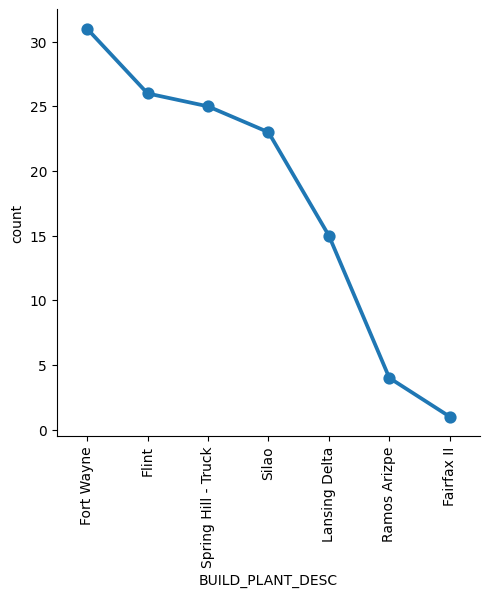

In [ ]:
# analysing MAKE wrt to plant

# NebulaCruiser
print(raw_data_t3[raw_data_t3['MAKE']=='NebulaCruiser']['BUILD_PLANT_DESC'].value_counts())
(raw_data_t3[raw_data_t3['MAKE']=='NebulaCruiser']['BUILD_PLANT_DESC'].value_counts()/996)*100

sns.catplot(raw_data_t3[raw_data_t3['MAKE']=='NebulaCruiser']['BUILD_PLANT_DESC'].value_counts(),kind='point')
plt.xticks(rotation=90)

# NebulaCruiser is mostly made in Fort Wayne, followed by Flint and Spring Hill- Truck. Only 1 unit is produced in Fairfax II.



BUILD_PLANT_DESC
Fort Wayne             108
Flint                   98
Silao                   94
Spring Hill - Truck     84
Lansing Delta           70
Ramos Arizpe            20
Fairfax II               7
Lansing - LGR            5
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Fort Wayne'),
  Text(1, 0, 'Flint'),
  Text(2, 0, 'Silao'),
  Text(3, 0, 'Spring Hill - Truck'),
  Text(4, 0, 'Lansing Delta'),
  Text(5, 0, 'Ramos Arizpe'),
  Text(6, 0, 'Fairfax II'),
  Text(7, 0, 'Lansing - LGR')])

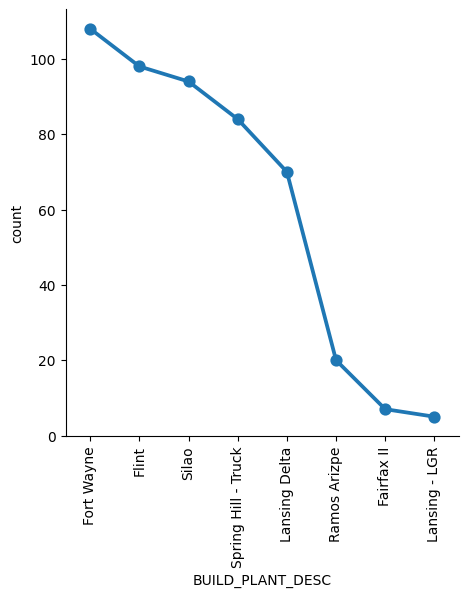

In [ ]:
# analysing MAKE wrt to plant

# ThunderVolt
print(raw_data_t3[raw_data_t3['MAKE']=='ThunderVolt']['BUILD_PLANT_DESC'].value_counts())
(raw_data_t3[raw_data_t3['MAKE']=='ThunderVolt']['BUILD_PLANT_DESC'].value_counts()/996)*100

sns.catplot(raw_data_t3[raw_data_t3['MAKE']=='ThunderVolt']['BUILD_PLANT_DESC'].value_counts(),kind='point')
plt.xticks(rotation=90)

# ThunderVolt is mostly manufactured in Fort Wayne, folowed by Flint and Silao. Lansing - LGR produces a mere 5 units of the same.



BUILD_PLANT_DESC
Flint                  12
Lansing Delta          12
Fort Wayne             11
Silao                   7
Spring Hill - Truck     7
Lansing - LGR           2
Fairfax II              1
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Flint'),
  Text(1, 0, 'Lansing Delta'),
  Text(2, 0, 'Fort Wayne'),
  Text(3, 0, 'Silao'),
  Text(4, 0, 'Spring Hill - Truck'),
  Text(5, 0, 'Lansing - LGR'),
  Text(6, 0, 'Fairfax II')])

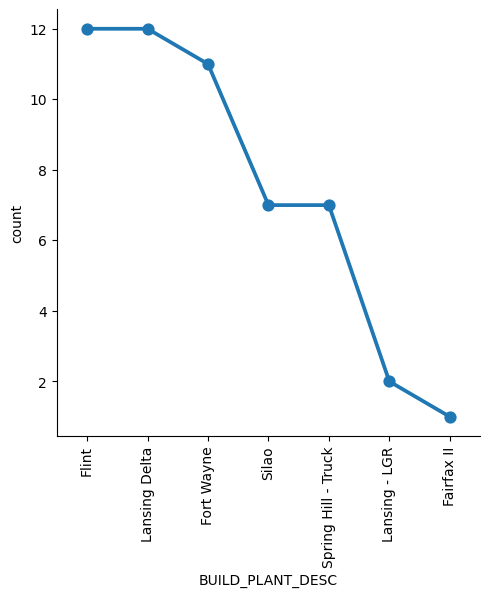

In [ ]:
# analysing MAKE wrt to plant

# TurboFlux
print(raw_data_t3[raw_data_t3['MAKE']=='TurboFlux']['BUILD_PLANT_DESC'].value_counts())
(raw_data_t3[raw_data_t3['MAKE']=='TurboFlux']['BUILD_PLANT_DESC'].value_counts()/996)*100

sns.catplot(raw_data_t3[raw_data_t3['MAKE']=='TurboFlux']['BUILD_PLANT_DESC'].value_counts(),kind='point')
plt.xticks(rotation=90)

# Interestingly, both Flint and Lansing Delta produce same number of TurboFlux. Fairfax II produces just 1 unit.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'HyperFury X'),
  Text(1, 0, 'TurboFlare'),
  Text(2, 0, 'QuantumRider'),
  Text(3, 0, 'AeroSpecter'),
  Text(4, 0, 'NebulaJet'),
  Text(5, 0, 'ElectroStreak'),
  Text(6, 0, 'StellarGlide'),
  Text(7, 0, 'ShadowPulse'),
  Text(8, 0, 'FusionNova'),
  Text(9, 0, 'SolarStriker'),
  Text(10, 0, 'ThunderBlitz'),
  Text(11, 0, 'GalacticRoamer'),
  Text(12, 0, 'InfernoSprint'),
  Text(13, 0, 'ZenithCruiser'),
  Text(14, 0, 'WarpDriveX'),
  Text(15, 0, 'CelestialVortex'),
  Text(16, 0, 'OrionScout'),
  Text(17, 0, 'PhotonChaser'),
  Text(18, 0, 'MirageQuest'),
  Text(19, 0, 'InfinityRider'),
  Text(20, 0, 'QuantumGlider'),
  Text(21, 0, 'AstroStinger'),
  Text(22, 0, 'CosmicRipple')])

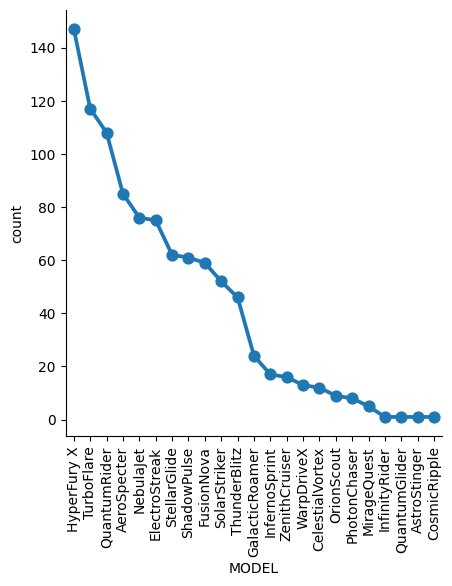

In [ ]:
# Model analysis
raw_data_t3['MODEL'].value_counts()
# Top 3 models manufactured are HyperFury X (147 units), TurboFlare (117 units), and QuantumRider (108 units).

sns.catplot(raw_data_t3['MODEL'].value_counts(),kind='point')
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Flint'),
  Text(1, 0, 'Spring Hill - Truck'),
  Text(2, 0, 'Fort Wayne'),
  Text(3, 0, 'Silao'),
  Text(4, 0, 'Lansing Delta'),
  Text(5, 0, 'Ramos Arizpe'),
  Text(6, 0, 'Fairfax II'),
  Text(7, 0, 'Lansing - LGR')])

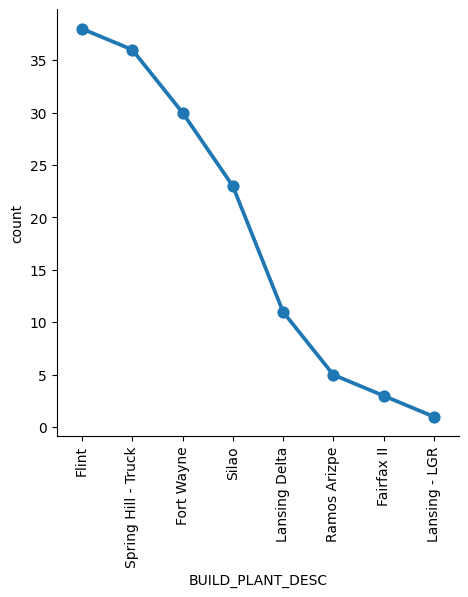

In [ ]:
raw_data_t3[raw_data_t3['MODEL']=='HyperFury X']['MAKE']
# HyperFury X is manufactured by ThunderVolt.

raw_data_t3[raw_data_t3['MODEL']=='HyperFury X']['BUILD_PLANT_DESC'].value_counts()
# It is mostly manufactured at Flint, followed by Spring Hill - Truck and Fort Wayne.

sns.catplot(raw_data_t3[raw_data_t3['MODEL']=='HyperFury X']['BUILD_PLANT_DESC'].value_counts(),kind='point')
plt.xticks(rotation=90)

4      ThunderVolt
12     ThunderVolt
13     ThunderVolt
21     ThunderVolt
32     ThunderVolt
          ...     
932    ThunderVolt
989    ThunderVolt
992    ThunderVolt
995    ThunderVolt
999    ThunderVolt
Name: MAKE, Length: 117, dtype: object


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Fort Wayne'),
  Text(1, 0, 'Silao'),
  Text(2, 0, 'Flint'),
  Text(3, 0, 'Lansing Delta'),
  Text(4, 0, 'Spring Hill - Truck'),
  Text(5, 0, 'Ramos Arizpe')])

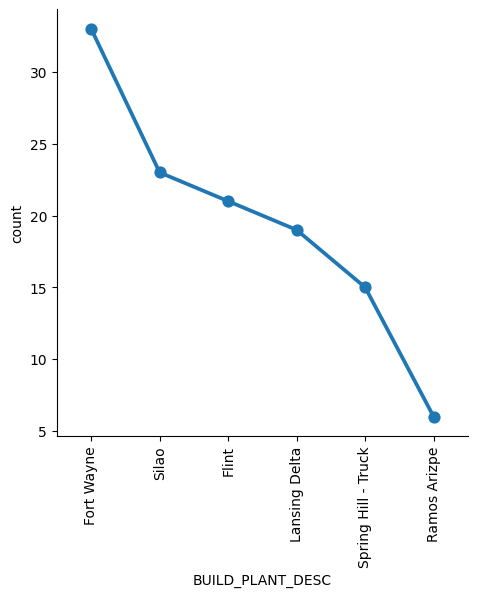

In [ ]:
print(raw_data_t3[raw_data_t3['MODEL']=='TurboFlare']['MAKE'])
# TurboFlare is manufactured by ThunderVolt.

raw_data_t3[raw_data_t3['MODEL']=='TurboFlare']['BUILD_PLANT_DESC'].value_counts()
# It is mostly manufactured at Fort Wayne, followed by Silao and Flint.

sns.catplot(raw_data_t3[raw_data_t3['MODEL']=='TurboFlare']['BUILD_PLANT_DESC'].value_counts(),kind='point')
plt.xticks(rotation=90)

16     ThunderVolt
17     ThunderVolt
27     ThunderVolt
35     ThunderVolt
52     ThunderVolt
          ...     
904    ThunderVolt
926    ThunderVolt
957    ThunderVolt
976    ThunderVolt
993    ThunderVolt
Name: MAKE, Length: 108, dtype: object


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Fort Wayne'),
  Text(1, 0, 'Lansing Delta'),
  Text(2, 0, 'Flint'),
  Text(3, 0, 'Silao'),
  Text(4, 0, 'Spring Hill - Truck'),
  Text(5, 0, 'Ramos Arizpe'),
  Text(6, 0, 'Fairfax II')])

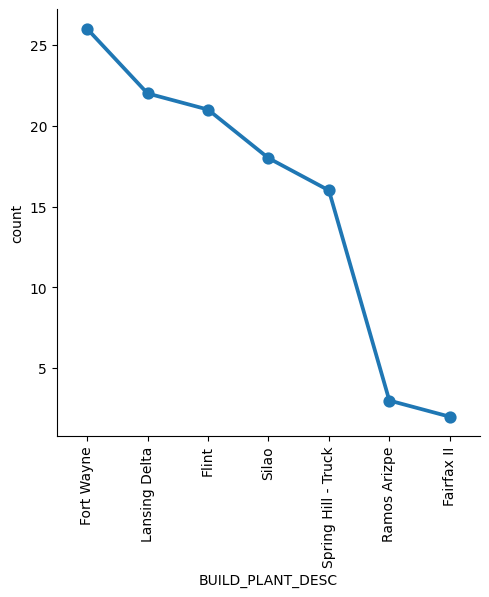

In [ ]:
print(raw_data_t3[raw_data_t3['MODEL']=='QuantumRider']['MAKE'])
# TurboFlare is manufactured by ThunderVolt.

raw_data_t3[raw_data_t3['MODEL']=='QuantumRider']['BUILD_PLANT_DESC'].value_counts()
# It is mostly manufactured at Fort Wayne, followed by Lansing Delta and Flint.

sns.catplot(raw_data_t3[raw_data_t3['MODEL']=='QuantumRider']['BUILD_PLANT_DESC'].value_counts(),kind='point')
plt.xticks(rotation=90)


## Interestingly, all the top 3 models are manufactured by ThunderVolt

CAUSAL_CD_DESC
Module/Component-No/Incorrect Communication             377
Module/Component-Shorted                                237
Module/Component-Registers Incorrectly                  120
Wiring/Electrical/Sensors-No/Incorrect Communication     50
Module/Component-Broken                                  41
Wiring/Electrical/Sensors-Shorted                        23
Other-Campaign/ Tech Bulletin                            22
Other-Follow operation                                   22
Other-No trouble found  - adjusted / reprogrammed        21
Wiring/Electrical/Sensors-Registers Incorrectly          12
Module/Component-Poor Contact                             9
Module/Component-Worn/Stripped                            8
Module/Component-Damaged/Cracked                          8
Module/Component-Discharge                                7
Module/Component-Incorrect Version                        5
Rotating Part-Alignment/Adjustment                        4
Module/Component-Alignmen

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'Module/Component-No/Incorrect Communication'),
  Text(1, 0, 'Module/Component-Shorted'),
  Text(2, 0, 'Module/Component-Registers Incorrectly'),
  Text(3, 0, 'Wiring/Electrical/Sensors-No/Incorrect Communication'),
  Text(4, 0, 'Module/Component-Broken'),
  Text(5, 0, 'Wiring/Electrical/Sensors-Shorted'),
  Text(6, 0, 'Other-Campaign/ Tech Bulletin'),
  Text(7, 0, 'Other-Follow operation'),
  Text(8, 0, 'Other-No trouble found  - adjusted / reprogrammed'),
  Text(9, 0, 'Wiring/Electrical/Sensors-Registers Incorrectly'),
  Text(10, 0, 'Module/Component-Poor Contact'),
  Text(11, 0, 'Module/Component-Worn/Stripped'),
  Text(12, 0, 'Module/Component-Damaged/Cracked'),
  Text(13, 0, 'Module/Component-Discharge'),
  Text(14, 0, 'Module/Component-Incorrect Versio

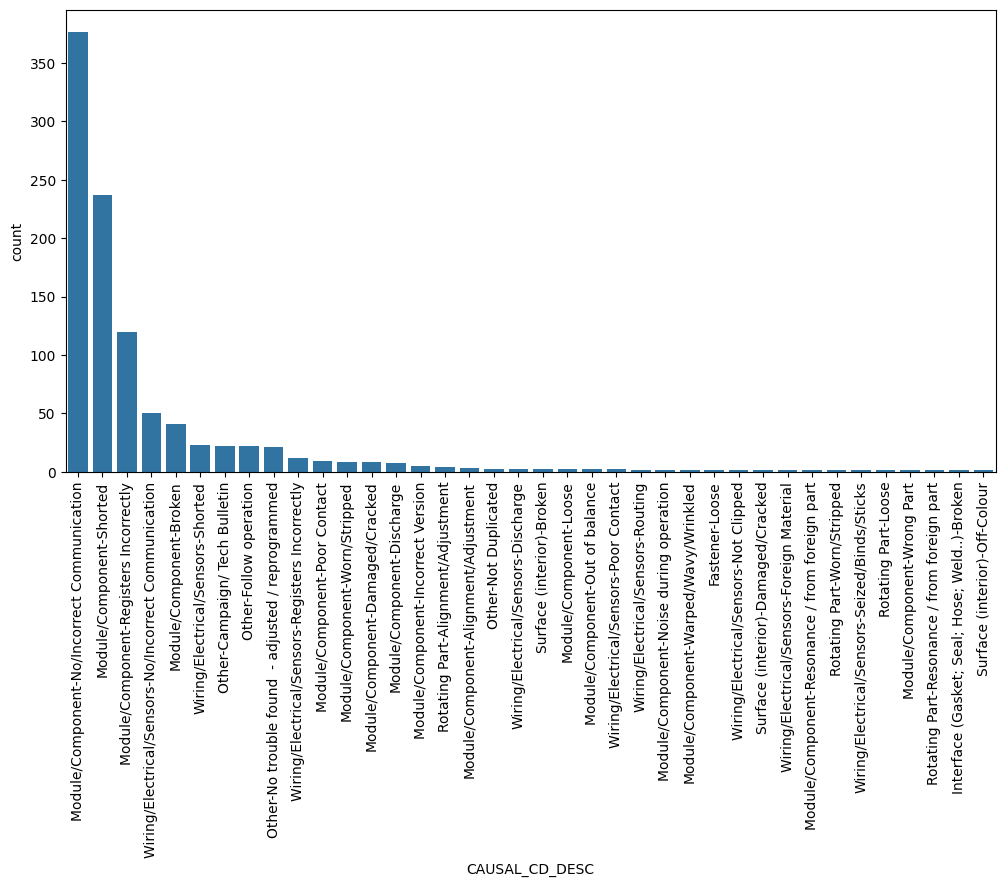

In [ ]:
# Analysing CAUSAL_CD_DESC
print(raw_data_t3['CAUSAL_CD_DESC'].value_counts())

fig,ax=plt.subplots(figsize=(12,6))

sns.barplot(raw_data_t3['CAUSAL_CD_DESC'].value_counts(),ax=ax)

plt.xticks(rotation=90)

# CAUSAL_CD_DESC has mainly 6 categories - Module/Component - 16 sub-categories
# Wiring/Electrical/Sensors - 9 sub-categories
# Other - 4 sub-categories
# Rotating Part - 4 sub-categories
# Surface - 3 sub-categories
# Fastener - 1 / no sub-categories
# Interface - 1 / no sub-categories

COMPLAINT_CD_DESC
Audio/Entertainment/Navigation - Audio                336
Audio/Entertainment/Navigation - Other issues         262
Audio/Entertainment/Navigation - Communication        192
Audio/Entertainment/Navigation - Video                103
Features/Controls/Displays - Other issues              47
Audio/Entertainment/Navigation - Navigation            32
Features/Controls/Displays - Gauges/Warning Lights     12
 Audio/Entertainment/Navigation - Abnormal Noise       11
Features/Controls/Displays - Odometer                   1
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Audio/Entertainment/Navigation - Audio'),
  Text(1, 0, 'Audio/Entertainment/Navigation - Other issues'),
  Text(2, 0, 'Audio/Entertainment/Navigation - Communication'),
  Text(3, 0, 'Audio/Entertainment/Navigation - Video'),
  Text(4, 0, 'Features/Controls/Displays - Other issues'),
  Text(5, 0, 'Audio/Entertainment/Navigation - Navigation'),
  Text(6, 0, 'Features/Controls/Displays - Gauges/Warning Lights'),
  Text(7, 0, '\xa0Audio/Entertainment/Navigation\xa0-\xa0Abnormal\xa0Noise'),
  Text(8, 0, 'Features/Controls/Displays - Odometer')])

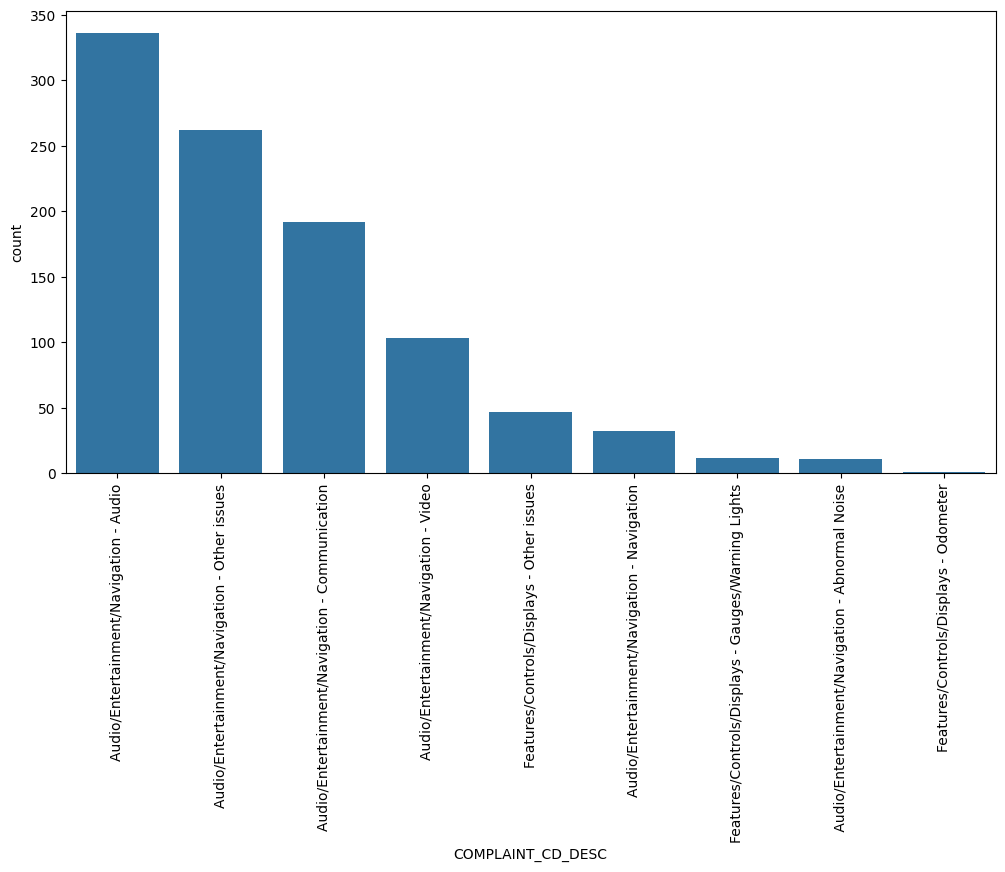

In [ ]:
# Complaint cd analysis

print(raw_data_t3['COMPLAINT_CD_DESC'].value_counts())
fig,ax=plt.subplots(figsize=(12,6))


sns.barplot(raw_data_t3['COMPLAINT_CD_DESC'].value_counts(),ax=ax)

plt.xticks(rotation=90)

# COMPLAINT_CD_DESC can be ccategorised into the following :-

# 1. Audio/Entertainment/Navigation - 6 sub-categories - Audio, Other issues, Communication, Video, Navigation, Abnormal Noise
# 2. Features/Controls/Displays - 3 sub-categories - Other issues, Gauges/Warning Lights, Odometer



In [ ]:

#
# multi-indexing the 'COMPLAINT_CD_DESC' column

raw_data_t3['COMPLAINT_CD_DESC_main_category'] = raw_data_t3['COMPLAINT_CD_DESC'].str.split('-', expand=True)[0].str.strip()
raw_data_t3['COMPLAINT_CD_DESC_sub_category'] = raw_data_t3['COMPLAINT_CD_DESC'].str.split('-', expand=True)[1].str.strip()

# Create the multi-index
raw_data_t3=raw_data_t3.set_index(['COMPLAINT_CD_DESC_main_category', 'COMPLAINT_CD_DESC_sub_category'])

In [ ]:
raw_data_t3=raw_data_t3.reset_index() # decreasing the level of multi-level



In [ ]:
raw_data_t3 # removes the multi-level indexing and gets a dataframe with 2 more columns - COMPLAINT_CD_DESC_main_category and COMPLAINT_CD_DESC_sub_category total 17 columns now.

,COMPLAINT_CD_DESC_main_category,COMPLAINT_CD_DESC_sub_category,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,Unnamed: 6,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT
0,Audio/Entertainment/Navigation,Other issues,D-14801,2019-09-17,unable to duplicate the concern at this time r...,"waiting for techline engineering response, att...",Customer reports that radio and screen is inte...,2019-08-14,2337,Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Other issues,2019-09-10,NovaSprint,AeroSpecter,2020,FLT
1,Audio/Entertainment/Navigation,Other issues,D-14869,2020-07-06,upon inspection radio screen was found to be b...,and ground at radio as stated in service info ...,RADIO IS INOPERABLE CHECK AND ADVISE,2019-08-16,2210,Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Other issues,2020-03-26,NebulaCruiser,StellarGlide,2020,FTW
2,Audio/Entertainment/Navigation,Other issues,D-14555,2020-01-09,Scanned found no codes checked for bulletins f...,radio module internal failure,CUSTOMER STATES RADIO SCREEN AND ONSTAR KEEPS ...,2019-08-06,2144,Flint,Module/Component-Worn/Stripped,Audio/Entertainment/Navigation - Other issues,2019-11-29,ThunderVolt,HyperFury X,2020,FLT
3,Features/Controls/Displays,Other issues,D-14704,2020-04-14,"PANTALLA SE PONE NEGRA, LO QUE PROVOCA QUE AL ...",DESPUES DE REALIZAR LA INPECCION VISUAL Y OPER...,PANTALLA SE PONE NEGRA,2019-08-12,2063,Spring Hill - Truck,Module/Component-No/Incorrect Communication,Features/Controls/Displays - Other issues,2019-12-26,ThunderVolt,HyperFury X,2020,SHT
4,Audio/Entertainment/Navigation,Other issues,D-15142,2020-11-23,INSPECTED VEHICLE AND CONFIRMED THAT THE...,SCRANNED FOR CODES NONE FOUND FOUND UPDATE N...,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,2019-08-27,2060,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,2019-10-31,ThunderVolt,TurboFlare,2020,FTW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Audio/Entertainment/Navigation,Other issues,D-14576,2020-09-03,internal radio short,replaced radio,radio screen goes blank,2019-08-07,57,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,2019-09-04,ThunderVolt,TurboFlare,2020,FTW
992,Audio/Entertainment/Navigation,Audio,D-15355,2020-04-02,iNTERNAL FAULT IN RADIO,REPLACED RADIO,RADIO WON'T LIGHT UP,2019-09-04,57,Silao,Module/Component-Shorted,Audio/Entertainment/Navigation - Audio,2020-05-27,ThunderVolt,WarpDriveX,2020,SIL
993,Audio/Entertainment/Navigation,Audio,D-15322,2021-03-22,FOUJND RADIO INERNAL SHORT,REPLACE RADIO,CAMERA FREEZING UP,2019-09-03,57,Flint,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Audio,2019-09-28,NebulaCruiser,StellarGlide,2020,FLT
994,Audio/Entertainment/Navigation,Video,D-14741,2019-10-11,INTERNAL FAILURE IN RADIO,REPLACE RADIO,BLANK RADIO SREEN,2019-08-13,55,Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Video,2019-09-28,ThunderVolt,ZenithCruiser,2020,FTW


In [ ]:
# Now, performing multi-level indexing on the basis of the column CAUSAL_CD_DESC


raw_data_t3['CAUSAL_CD_DESC_main_category'] = raw_data_t3['CAUSAL_CD_DESC'].str.split('-', expand=True)[0].str.strip()
raw_data_t3['CAUSAL_CD_DESC_sub_category'] = raw_data_t3['CAUSAL_CD_DESC'].str.split('-', expand=True)[1].str.strip()

# Create the multi-index
raw_data_t3=raw_data_t3.set_index(['CAUSAL_CD_DESC_main_category', 'CAUSAL_CD_DESC_sub_category'])




In [ ]:
raw_data_t3 # multi-index dataframe with respect to CAUSAL_CD_DESC_main_category and CAUSAL_CD_DESC_sub_category

COMPLAINT_CD_DESC_main_category  \
CAUSAL_CD_DESC_main_category CAUSAL_CD_DESC_sub_category                                   
Module/Component             No/Incorrect Communication   Audio/Entertainment/Navigation   
                             Shorted                      Audio/Entertainment/Navigation   
                             Worn/Stripped                Audio/Entertainment/Navigation   
                             No/Incorrect Communication       Features/Controls/Displays   
                             Registers Incorrectly        Audio/Entertainment/Navigation   
...                                                                                  ...   
                             Registers Incorrectly        Audio/Entertainment/Navigation   
                             Shorted                      Audio/Entertainment/Navigation   
                             Registers Incorrectly        Audio/Entertainment/Navigation   
                             Shorted                      Audio/Entertainment/Navigation   
                             Registers Incorrectly        Audio/Entertainment/Navigation   

                                                         COMPLAINT_CD_DESC_sub_category  \
CAUSAL_CD_DESC_main_category CAUSAL_CD_DESC_sub_category                                  
Module/Component             No/Incorrect Communication                    Other issues   
                             Shorted                                       Other issues   
                             Worn/Stripped                                 Other issues   
                             No/Incorrect Communication                    Other issues   
                             Registers Incorrectly                         Other issues   
...                                                                                 ...   
                             Registers Incorrectly                         Other issues   
                             Shorted                                              Audio   
                             Registers Incorrectly                                Audio   
                             Shorted                                              Video   
                             Registers Incorrectly                         Other issues   

                                                         Event id Opened date  \
CAUSAL_CD_DESC_main_category CAUSAL_CD_DESC_sub_category                        
Module/Component             No/Incorrect Communication   D-14801  2019-09-17   
                             Shorted                      D-14869  2020-07-06   
                             Worn/Stripped                D-14555  2020-01-09   
                             No/Incorrect Communication   D-14704  2020-04-14   
                             Registers Incorrectly        D-15142  2020-11-23   
...                                                           ...         ...   
                             Registers Incorrectly        D-14576  2020-09-03   
                             Shorted                      D-15355  2020-04-02   
                             Registers Incorrectly        D-15322  2021-03-22   
                             Shorted                      D-14741  2019-10-11   
                             Registers Incorrectly        D-15259  2021-02-10   

                                                                                            CAUSAL_VERBATIM  \
CAUSAL_CD_DESC_main_category CAUSAL_CD_DESC_sub_category                                                      
Module/Component             No/Incorrect Communication   unable to duplicate the concern at this time r...   
                             Shorted                      upon inspection radio screen was found to be b...   
                             Worn/Stripped                Scanned found no codes checked for bulletins f...   
                             No/Incorrect Communication   PANTALLA 

In [ ]:
# now unstacking/ decreasing the levle of multi-indexing
raw_data_t3=raw_data_t3.reset_index()

In [ ]:
raw_data_t3 # Now, the multi-index has a decreased level with 2 more columns - CAUSAL_CD_DESC_main_category and CAUSAL_CD_DESC_sub_category

,CAUSAL_CD_DESC_main_category,CAUSAL_CD_DESC_sub_category,COMPLAINT_CD_DESC_main_category,COMPLAINT_CD_DESC_sub_category,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,Unnamed: 6,BUILD_PLANT_DESC,CAUSAL_CD_DESC,COMPLAINT_CD_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT
0,Module/Component,No/Incorrect Communication,Audio/Entertainment/Navigation,Other issues,D-14801,2019-09-17,unable to duplicate the concern at this time r...,"waiting for techline engineering response, att...",Customer reports that radio and screen is inte...,2019-08-14,2337,Flint,Module/Component-No/Incorrect Communication,Audio/Entertainment/Navigation - Other issues,2019-09-10,NovaSprint,AeroSpecter,2020,FLT
1,Module/Component,Shorted,Audio/Entertainment/Navigation,Other issues,D-14869,2020-07-06,upon inspection radio screen was found to be b...,and ground at radio as stated in service info ...,RADIO IS INOPERABLE CHECK AND ADVISE,2019-08-16,2210,Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Other issues,2020-03-26,NebulaCruiser,StellarGlide,2020,FTW
2,Module/Component,Worn/Stripped,Audio/Entertainment/Navigation,Other issues,D-14555,2020-01-09,Scanned found no codes checked for bulletins f...,radio module internal failure,CUSTOMER STATES RADIO SCREEN AND ONSTAR KEEPS ...,2019-08-06,2144,Flint,Module/Component-Worn/Stripped,Audio/Entertainment/Navigation - Other issues,2019-11-29,ThunderVolt,HyperFury X,2020,FLT
3,Module/Component,No/Incorrect Communication,Features/Controls/Displays,Other issues,D-14704,2020-04-14,"PANTALLA SE PONE NEGRA, LO QUE PROVOCA QUE AL ...",DESPUES DE REALIZAR LA INPECCION VISUAL Y OPER...,PANTALLA SE PONE NEGRA,2019-08-12,2063,Spring Hill - Truck,Module/Component-No/Incorrect Communication,Features/Controls/Displays - Other issues,2019-12-26,ThunderVolt,HyperFury X,2020,SHT
4,Module/Component,Registers Incorrectly,Audio/Entertainment/Navigation,Other issues,D-15142,2020-11-23,INSPECTED VEHICLE AND CONFIRMED THAT THE...,SCRANNED FOR CODES NONE FOUND FOUND UPDATE N...,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,2019-08-27,2060,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,2019-10-31,ThunderVolt,TurboFlare,2020,FTW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Module/Component,Registers Incorrectly,Audio/Entertainment/Navigation,Other issues,D-14576,2020-09-03,internal radio short,replaced radio,radio screen goes blank,2019-08-07,57,Fort Wayne,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Other issues,2019-09-04,ThunderVolt,TurboFlare,2020,FTW
992,Module/Component,Shorted,Audio/Entertainment/Navigation,Audio,D-15355,2020-04-02,iNTERNAL FAULT IN RADIO,REPLACED RADIO,RADIO WON'T LIGHT UP,2019-09-04,57,Silao,Module/Component-Shorted,Audio/Entertainment/Navigation - Audio,2020-05-27,ThunderVolt,WarpDriveX,2020,SIL
993,Module/Component,Registers Incorrectly,Audio/Entertainment/Navigation,Audio,D-15322,2021-03-22,FOUJND RADIO INERNAL SHORT,REPLACE RADIO,CAMERA FREEZING UP,2019-09-03,57,Flint,Module/Component-Registers Incorrectly,Audio/Entertainment/Navigation - Audio,2019-09-28,NebulaCruiser,StellarGlide,2020,FLT
994,Module/Component,Shorted,Audio/Entertainment/Navigation,Video,D-14741,2019-10-11,INTERNAL FAILURE IN RADIO,REPLACE RADIO,BLANK RADIO SREEN,2019-08-13,55,Fort Wayne,Module/Component-Shorted,Audio/Entertainment/Navigation - Video,2019-09-28,ThunderVolt,ZenithCruiser,2020,FTW


In [ ]:
# Dropping the columns casual_cd and complaint_cd as both of them are taken into account with multi-indexing and adjusting the levels.

raw_data_t3.drop(['CAUSAL_CD_DESC','COMPLAINT_CD_DESC'],axis=1,inplace=True)


In [ ]:
raw_data_t3

,CAUSAL_CD_DESC_main_category,CAUSAL_CD_DESC_sub_category,COMPLAINT_CD_DESC_main_category,COMPLAINT_CD_DESC_sub_category,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,Unnamed: 6,BUILD_PLANT_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT
0,Module/Component,No/Incorrect Communication,Audio/Entertainment/Navigation,Other issues,D-14801,2019-09-17,unable to duplicate the concern at this time r...,"waiting for techline engineering response, att...",Customer reports that radio and screen is inte...,2019-08-14,2337,Flint,2019-09-10,NovaSprint,AeroSpecter,2020,FLT
1,Module/Component,Shorted,Audio/Entertainment/Navigation,Other issues,D-14869,2020-07-06,upon inspection radio screen was found to be b...,and ground at radio as stated in service info ...,RADIO IS INOPERABLE CHECK AND ADVISE,2019-08-16,2210,Fort Wayne,2020-03-26,NebulaCruiser,StellarGlide,2020,FTW
2,Module/Component,Worn/Stripped,Audio/Entertainment/Navigation,Other issues,D-14555,2020-01-09,Scanned found no codes checked for bulletins f...,radio module internal failure,CUSTOMER STATES RADIO SCREEN AND ONSTAR KEEPS ...,2019-08-06,2144,Flint,2019-11-29,ThunderVolt,HyperFury X,2020,FLT
3,Module/Component,No/Incorrect Communication,Features/Controls/Displays,Other issues,D-14704,2020-04-14,"PANTALLA SE PONE NEGRA, LO QUE PROVOCA QUE AL ...",DESPUES DE REALIZAR LA INPECCION VISUAL Y OPER...,PANTALLA SE PONE NEGRA,2019-08-12,2063,Spring Hill - Truck,2019-12-26,ThunderVolt,HyperFury X,2020,SHT
4,Module/Component,Registers Incorrectly,Audio/Entertainment/Navigation,Other issues,D-15142,2020-11-23,INSPECTED VEHICLE AND CONFIRMED THAT THE...,SCRANNED FOR CODES NONE FOUND FOUND UPDATE N...,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,2019-08-27,2060,Fort Wayne,2019-10-31,ThunderVolt,TurboFlare,2020,FTW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Module/Component,Registers Incorrectly,Audio/Entertainment/Navigation,Other issues,D-14576,2020-09-03,internal radio short,replaced radio,radio screen goes blank,2019-08-07,57,Fort Wayne,2019-09-04,ThunderVolt,TurboFlare,2020,FTW
992,Module/Component,Shorted,Audio/Entertainment/Navigation,Audio,D-15355,2020-04-02,iNTERNAL FAULT IN RADIO,REPLACED RADIO,RADIO WON'T LIGHT UP,2019-09-04,57,Silao,2020-05-27,ThunderVolt,WarpDriveX,2020,SIL
993,Module/Component,Registers Incorrectly,Audio/Entertainment/Navigation,Audio,D-15322,2021-03-22,FOUJND RADIO INERNAL SHORT,REPLACE RADIO,CAMERA FREEZING UP,2019-09-03,57,Flint,2019-09-28,NebulaCruiser,StellarGlide,2020,FLT
994,Module/Component,Shorted,Audio/Entertainment/Navigation,Video,D-14741,2019-10-11,INTERNAL FAILURE IN RADIO,REPLACE RADIO,BLANK RADIO SREEN,2019-08-13,55,Fort Wayne,2019-09-28,ThunderVolt,ZenithCruiser,2020,FTW


In [ ]:
# Now detecting language of the text across and adding a separate column of language in the dataframe

# Detecting the language
from googletrans import Translator

translator = Translator()
language = []
for i in range(len(raw_data_t3['CAUSAL_VERBATIM'])):
    try:
        language.append(translator.detect(raw_data_t3['CAUSAL_VERBATIM'][i]).lang)
    except:
        language.append('unknown')

In [ ]:
# Adding language column to the dataframe
raw_data_t3['language']=pd.Series(language) # en for English, es for Spanish, fr for French.
# Some values are labelled 'unknown' due to shortage of text/ due to lack of the better method to evaluate.

language
en         0.744980
unknown    0.242972
fr         0.008032
es         0.001004
ca         0.001004
nl         0.001004
da         0.001004
Name: count, dtype: float64


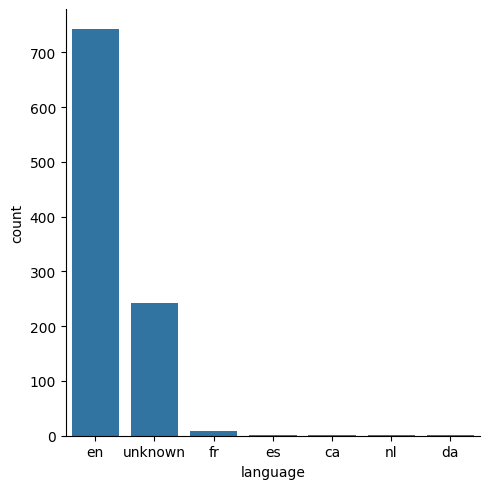

In [ ]:
# Analysing the language of the text
print(raw_data_t3['language'].value_counts()/996)

sns.catplot(raw_data_t3['language'].value_counts(), kind='bar')
# more than 75% of the data values are classifed to English.
# Only a few entries are classified as French and Spanish, comprising just above 1% of the total values.
# Rest of the values are classified as unknown. Nonetheless, there are high chances that they text belong to one of the aforementioned languages.

In [ ]:
raw_data_t3[raw_data_t3['language']=='unknown']

,CAUSAL_CD_DESC_main_category,CAUSAL_CD_DESC_sub_category,COMPLAINT_CD_DESC_main_category,COMPLAINT_CD_DESC_sub_category,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,Unnamed: 6,BUILD_PLANT_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT,language
618,Module/Component,Incorrect Version,Audio/Entertainment/Navigation,Audio,D-14959,2020-02-27,TAC CASE # - (JEREMY) REPLACE RADIO MODULE,diagnose for blank screen. test circuit and co...,CONCERN: RADIO SCREEN WILL NOT WORK AT ALL - T...,2019-08-20,281,Lansing Delta,2020-01-03,NovaSprint,AeroSpecter,2020,DEL,unknown
624,Module/Component,No/Incorrect Communication,Features/Controls/Displays,Gauges/Warning Lights,D-14870,2020-05-11,DIAG SCAN TEST DTC REAR VIEW CAMERA SET IN...,"REPLACED AND PROGRAMMED THE RADIO, INSTALLED U...",CUSTOMER STATES BACKUP CAMERA IS INOPERATIVE.,2019-08-16,278,Fort Wayne,2019-10-30,NebulaCruiser,StellarGlide,2020,FTW,unknown
626,Wiring/Electrical/Sensors,No/Incorrect Communication,Audio/Entertainment/Navigation,Other issues,D-15005,2021-03-01,"verified concern ,no codes test all circuts -r...",replaced radio as per tac -tac case # - and ...,CUSTOMER STATES BLUETOOTH STREAMING INOP -CAN ...,2019-08-21,277,Lansing Delta,2019-08-22,TurboFlux,SolarStriker,2020,DEL,unknown
627,Module/Component,No/Incorrect Communication,Features/Controls/Displays,Other issues,D-14889,2019-09-26,RADIO LOCKED IN VALET MODE DUE TO INTERNAL RAD...,REPLACED RADIO AND PROGRAMMED PER TAC REQUEST ...,CUSTOMER STATES THAT THE CUE IS LOCKED UP IN V...,2019-08-17,277,Silao,2019-09-14,NebulaCruiser,ThunderBlitz,2020,SIL,unknown
630,Module/Component,Registers Incorrectly,Audio/Entertainment/Navigation,Communication,D-15047,2020-10-15,CHECKED FOR UPDATES NONE FOUND CHECKED FOR BUL...,INSTALLED NEW RADIO AND PROGRAMMED WCC,C S XM IN OP LOOSES SIGNAL FM WORKS GOOD,2019-08-23,276,Silao,2020-06-11,ThunderVolt,TurboFlare,2020,SIL,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,Module/Component,No/Incorrect Communication,Audio/Entertainment/Navigation,Audio,D-15433,2020-02-28,RADIO FAILURE TO HOLD XM,REPLACE RADIO ASSEMBLY,XM CHANNELS DROP OUT AT START UP AND GOINGDOWN...,2019-09-06,101,Ramos Arizpe,2019-10-01,ThunderVolt,WarpDriveX,2020,RAM,unknown
963,Module/Component,No/Incorrect Communication,Audio/Entertainment/Navigation,Communication,D-14691,2020-09-15,NO COMMUNICATION WITH RADIO- INOPERATIVE,REPLACED UNIT COMPLETE,CUSTOMER STATES CENTER DISPLAY INOP,2019-08-10,97,Silao,2019-09-30,NovaSprint,AeroSpecter,2020,SIL,unknown
973,Module/Component,Shorted,Audio/Entertainment/Navigation,Audio,D-15389,2019-10-12,radio locked in demo mode,replace and program radio per tac -,C/S LOCKED IN VALET MODE,2019-09-05,85,Silao,2019-10-11,ThunderVolt,WarpDriveX,2020,SIL,unknown
992,Module/Component,Shorted,Audio/Entertainment/Navigation,Audio,D-15355,2020-04-02,iNTERNAL FAULT IN RADIO,REPLACED RADIO,RADIO WON'T LIGHT UP,2019-09-04,57,Silao,2020-05-27,ThunderVolt,WarpDriveX,2020,SIL,unknown


In [ ]:
# Now adding 3 more columns corresponding to CASUAL_VERBATIM, CORRECTION_VERBATIM, and CUSTOMER_VERBATIM using transformers pipeline.

# CAUSAL_VERBATIM_CRUX

causal_verbatim_crux = []
for i in range(len(raw_data_t3['CAUSAL_VERBATIM'])):
    result = qa_pipeline(
        question="Summarise the problem or the issue mentioned?",
        context=str(raw_data_t3['CAUSAL_VERBATIM'][i]).lower()
    )['answer']
    causal_verbatim_crux.append(result)

causal_verbatim_crux = pd.Series(causal_verbatim_crux)





In [ ]:
# CORRECTION_VERBATIM_CRUX

correction_verbatim_crux = []
for i in range(len(raw_data_t3['CORRECTION_VERBATIM'])):
    result = qa_pipeline(
        question="What corrective measures were taken?",
        context=str(raw_data_t3['CORRECTION_VERBATIM'][i]).lower()
    )['answer']
    correction_verbatim_crux.append(result)

correction_verbatim_crux = pd.Series(correction_verbatim_crux)


# CUSTOMER_VERBATIM_CRUX

customer_verbatim_crux = []
for i in range(len(raw_data_t3['CUSTOMER_VERBATIM'])):
    result = qa_pipeline(
        question="Summarise the problem or the issue mentioned?",
        context=str(raw_data_t3['CUSTOMER_VERBATIM'][i]).lower()
    )['answer']
    customer_verbatim_crux.append(result)

customer_verbatim_crux = pd.Series(customer_verbatim_crux)

In [ ]:
# adding the newly evaluated crux to the dataframe

raw_data_t3['CAUSAL_VERBATIM_CRUX']=causal_verbatim_crux
raw_data_t3['CORRECTION_VERBATIM_CRUX']=correction_verbatim_crux
raw_data_t3['CUSTOMER_VERBATIM_CRUX']=customer_verbatim_crux

In [ ]:
raw_data_t3

,CAUSAL_CD_DESC_main_category,CAUSAL_CD_DESC_sub_category,COMPLAINT_CD_DESC_main_category,COMPLAINT_CD_DESC_sub_category,Event id,Opened date,CAUSAL_VERBATIM,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,BUILD_DATE,...,BUILD_PLANT_DESC,IN_USE_DATE,MAKE,MODEL,MODLYR,PLANT,language,CAUSAL_VERBATIM_CRUX,CORRECTION_VERBATIM_CRUX,CUSTOMER_VERBATIM_CRUX
0,Module/Component,No/Incorrect Communication,Audio/Entertainment/Navigation,Other issues,D-14801,2019-09-17,unable to duplicate the concern at this time r...,"waiting for techline engineering response, att...",Customer reports that radio and screen is inte...,2019-08-14,...,Flint,2019-09-10,NovaSprint,AeroSpecter,2020,FLT,en,nothing failed at this time no bulletins found...,reprogram the radio after engineering resolved...,customer reports that radio and screen is inte...
1,Module/Component,Shorted,Audio/Entertainment/Navigation,Other issues,D-14869,2020-07-06,upon inspection radio screen was found to be b...,and ground at radio as stated in service info ...,RADIO IS INOPERABLE CHECK AND ADVISE,2019-08-16,...,Fort Wayne,2020-03-26,NebulaCruiser,StellarGlide,2020,FTW,en,lost communicationwithradio,cleared codes and recheckedoperation,radio
2,Module/Component,Worn/Stripped,Audio/Entertainment/Navigation,Other issues,D-14555,2020-01-09,Scanned found no codes checked for bulletins f...,radio module internal failure,CUSTOMER STATES RADIO SCREEN AND ONSTAR KEEPS ...,2019-08-06,...,Flint,2019-11-29,ThunderVolt,HyperFury X,2020,FLT,en,a connection failure message,radio module internal failure,declines everytime
3,Module/Component,No/Incorrect Communication,Features/Controls/Displays,Other issues,D-14704,2020-04-14,"PANTALLA SE PONE NEGRA, LO QUE PROVOCA QUE AL ...",DESPUES DE REALIZAR LA INPECCION VISUAL Y OPER...,PANTALLA SE PONE NEGRA,2019-08-12,...,Spring Hill - Truck,2019-12-26,ThunderVolt,HyperFury X,2020,SHT,es,pantalla se pone negra,corrosión,pantalla se pone negra
4,Module/Component,Registers Incorrectly,Audio/Entertainment/Navigation,Other issues,D-15142,2020-11-23,INSPECTED VEHICLE AND CONFIRMED THAT THE...,SCRANNED FOR CODES NONE FOUND FOUND UPDATE N...,CUSTOMER STATES A MESSAGE OF LOST SATELITE SIG...,2019-08-27,...,Fort Wayne,2019-10-31,ThunderVolt,TurboFlare,2020,FTW,en,a satellite signal lost attempting to reconnec...,normal satellite radio operation,lost satelite signal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Module/Component,Registers Incorrectly,Audio/Entertainment/Navigation,Other issues,D-14576,2020-09-03,internal radio short,replaced radio,radio screen goes blank,2019-08-07,...,Fort Wayne,2019-09-04,ThunderVolt,TurboFlare,2020,FTW,en,internal radio short,replaced radio,radio screen goes blank
992,Module/Component,Shorted,Audio/Entertainment/Navigation,Audio,D-15355,2020-04-02,iNTERNAL FAULT IN RADIO,REPLACED RADIO,RADIO WON'T LIGHT UP,2019-09-04,...,Silao,2020-05-27,ThunderVolt,WarpDriveX,2020,SIL,unknown,internal fault,replaced radio,radio won't light up
993,Module/Component,Registers Incorrectly,Audio/Entertainment/Navigation,Audio,D-15322,2021-03-22,FOUJND RADIO INERNAL SHORT,REPLACE RADIO,CAMERA FREEZING UP,2019-09-03,...,Flint,2019-09-28,NebulaCruiser,StellarGlide,2020,FLT,unknown,foujnd radio inernal,replace radio,camera freezing up
994,Module/Component,Shorted,Audio/Entertainment/Navigation,Video,D-14741,2019-10-11,INTERNAL FAILURE IN RADIO,REPLACE RADIO,BLANK RADIO SREEN,2019-08-13,...,Fort Wayne,2019-09-28,ThunderVolt,ZenithCruiser,2020,FTW,en,internal failure,replace radio,blank radio sreen


In [ ]:
# Now calculating the similarity score between the relevant columns
# causalcrux and causal cd desc


# Load the Sentence Transformer model
model = SentenceTransformer('all-mpnet-base-v2')  #

sim_causal_sub_vs_verb=[]
# Encode the documents
for i in range(len(raw_data_t3)):
    doc1 = raw_data_t3['CAUSAL_CD_DESC_sub_category'][i]
    doc2 = raw_data_t3['CAUSAL_VERBATIM'][i]
    doc1_embedding = model.encode(doc1)
    doc2_embedding = model.encode(doc2)
    # Calculate semantic similarity
    similarity = 1 - cosine(doc1_embedding, doc2_embedding)
    sim_causal_sub_vs_verb.append(similarity)

sim_causal_sub_vs_verb

sim_causal_sub_vs_crux=[]
# Encode the documents
for i in range(len(raw_data_t3)):
    doc1 = raw_data_t3['CAUSAL_CD_DESC_sub_category'][i]
    doc2 = raw_data_t3['CAUSAL_VERBATIM_CRUX'][i]
    doc1_embedding = model.encode(doc1)
    doc2_embedding = model.encode(doc2)
    # Calculate semantic similarity
    similarity = 1 - cosine(doc1_embedding, doc2_embedding)
    sim_causal_sub_vs_crux.append(similarity)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
print(sim_causal_sub_vs_verb)
print(sim_causal_sub_vs_crux)

[0.22851787507534027, 0.13350552320480347, 0.07184171676635742, 0.11732900142669678, 0.16775363683700562, 0.011278979480266571, 0.15933457016944885, 0.22302556037902832, 0.10962282866239548, 0.17783406376838684, 0.12662512063980103, 0.22770676016807556, 0.12364190816879272, 0.15235760807991028, 0.21713164448738098, 0.7344210147857666, 0.12339890748262405, 0.21802286803722382, 0.25183749198913574, 0.19166941940784454, 0.29771894216537476, 0.21915526688098907, 0.294913649559021, 0.23974359035491943, 0.17255771160125732, 0.8041386604309082, 0.23901836574077606, 0.269624799489975, 0.31125321984291077, 0.203237384557724, 0.11863336712121964, 0.21311838924884796, 0.2972072660923004, 0.24196043610572815, 0.23475101590156555, 0.11245626956224442, 0.21363666653633118, 0.20467817783355713, 0.07632602751255035, 0.24261097609996796, 0.16772466897964478, 0.14172053337097168, 0.23455050587654114, 0.18460530042648315, 0.1964513063430786, 0.23969222605228424, 0.24303290247917175, 0.2251625508069992, 0

In [ ]:
# customercrux and complaint cd desc

# Load the Sentence Transformer model
model = SentenceTransformer('all-mpnet-base-v2')

sim_complain_sub_vs_verb = []
# Encode the documents
for i in range(len(raw_data_t3)):
    doc1 = raw_data_t3['COMPLAINT_CD_DESC_sub_category'][i]
    doc2 = raw_data_t3['CUSTOMER_VERBATIM'][i]
    if doc1 and doc2:
        doc1_embedding = model.encode(doc1)
        doc2_embedding = model.encode(doc2)
        # Calculate semantic similarity
        similarity = 1 - cosine(doc1_embedding, doc2_embedding)
        sim_complain_sub_vs_verb.append(similarity)
    else:
        sim_complain_sub_vs_verb.append(0)  # or any other default value

sim_complain_sub_vs_crux = []
# Encode the documents
for i in range(len(raw_data_t3)):
    doc1 = raw_data_t3['COMPLAINT_CD_DESC_sub_category'][i]
    doc2 = raw_data_t3['CUSTOMER_VERBATIM_CRUX'][i]
    if doc1 and doc2:
        doc1_embedding = model.encode(doc1)
        doc2_embedding = model.encode(doc2)
        # Calculate semantic similarity
        similarity = 1 - cosine(doc1_embedding, doc2_embedding)
        sim_complain_sub_vs_crux.append(similarity)
    else:
        sim_complain_sub_vs_crux.append(0)  # or any other default value


In [ ]:
print(sim_complain_sub_vs_verb)
print(sim_complain_sub_vs_crux)
# as the score improved it means the transformer model is more efficient in portraying the problem in the lesser words.

[0.31567662954330444, 0.19305093586444855, 0.2734743654727936, 0.024197541177272797, 0.20004507899284363, 0.13201488554477692, 0.311129093170166, 0.2102651745080948, 0.21364173293113708, 0.22598989307880402, 0.14677128195762634, 0.47879892587661743, 0.20091336965560913, 0.1193447858095169, 0.26780301332473755, 0.04173067957162857, 0.12728947401046753, 0.29001426696777344, 0.11966072022914886, 0.1307859718799591, 0.3115106225013733, 0.1257874220609665, 0.14301730692386627, 0.3353709578514099, 0.06861312687397003, 0.25538814067840576, 0.19780319929122925, 0.2706276774406433, 0.2272249460220337, 0.11318471282720566, 0.3827458620071411, 0.05473977327346802, 0.1199830174446106, 0.23599207401275635, 0.21491260826587677, 0.29296740889549255, 0.16841474175453186, 0.2973138689994812, 0.14978502690792084, 0.18622148036956787, 0.16500787436962128, 0.05907873809337616, 0.19823689758777618, 0.08347175270318985, 0.18413908779621124, 0.21059513092041016, 0.3260754644870758, 0.06209908425807953, 0.064

In [ ]:
# Now calculating the correlation between different categorical columns if any
# causal

# correlation bwtween build date and any specific complaint sub-category
# correlation between build date and any specific causal sub-category

# correlation between specific causal category/sub-category and build date

# specifc complaint and cause category and sub-cateogry related to any make, mode, or any build place

(array([18140., 18201., 18262., 18322., 18383., 18444., 18506., 18567.,
        18628., 18687.]),
 [Text(18140.0, 0, '2019-09'),
  Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07'),
  Text(18506.0, 0, '2020-09'),
  Text(18567.0, 0, '2020-11'),
  Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03')])

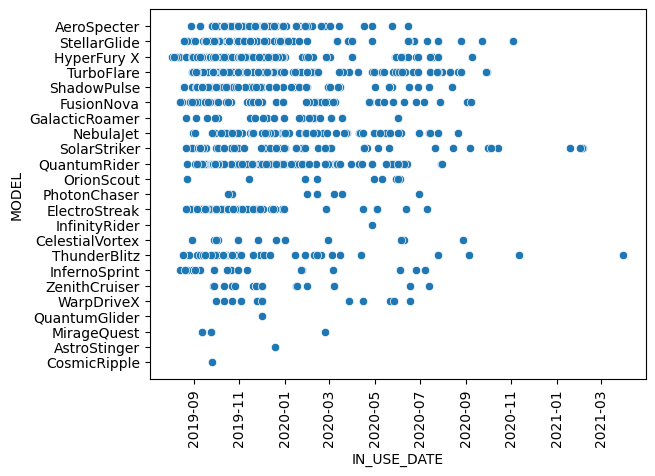

In [ ]:
sns.scatterplot(data=raw_data_t3,x='IN_USE_DATE',y='MODEL')

plt.xticks(rotation=90)

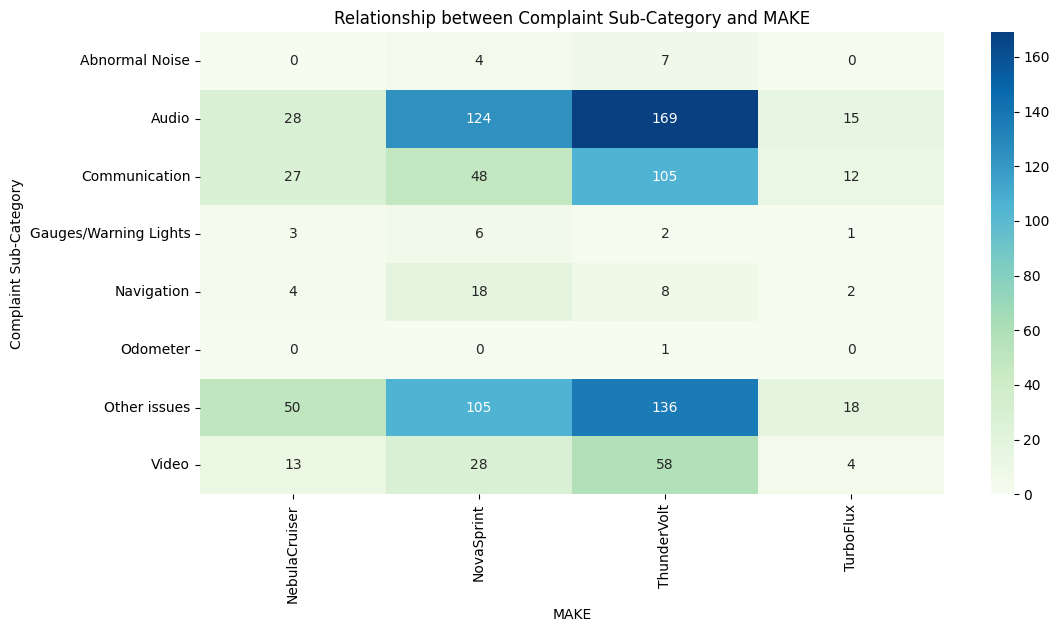

In [ ]:
# Correlation between various categorical variables

pivot_table = raw_data_t3.pivot_table(index='COMPLAINT_CD_DESC_sub_category', columns='MAKE', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between Complaint Sub-Category and MAKE')
ax.set_xlabel('MAKE')
ax.set_ylabel('Complaint Sub-Category')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

# THunderVolt has the maximum number of issues, followed by NovaSprint.TurboFlux has the least amount of overall complaints.
# Maximum complaints are related to Audio and on individual basis, ThunderVolt has the most cases followed by NovaSprint.
# The second highest cases are related to other issues, which is quite vague. It is followed by Communication, where ThunderVolt again tops the list.



(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Fairfax II'),
  Text(1.5, 0, 'Flint'),
  Text(2.5, 0, 'Fort Wayne'),
  Text(3.5, 0, 'Lansing - LGR'),
  Text(4.5, 0, 'Lansing Delta'),
  Text(5.5, 0, 'Ramos Arizpe'),
  Text(6.5, 0, 'Silao'),
  Text(7.5, 0, 'Spring Hill - Truck')])

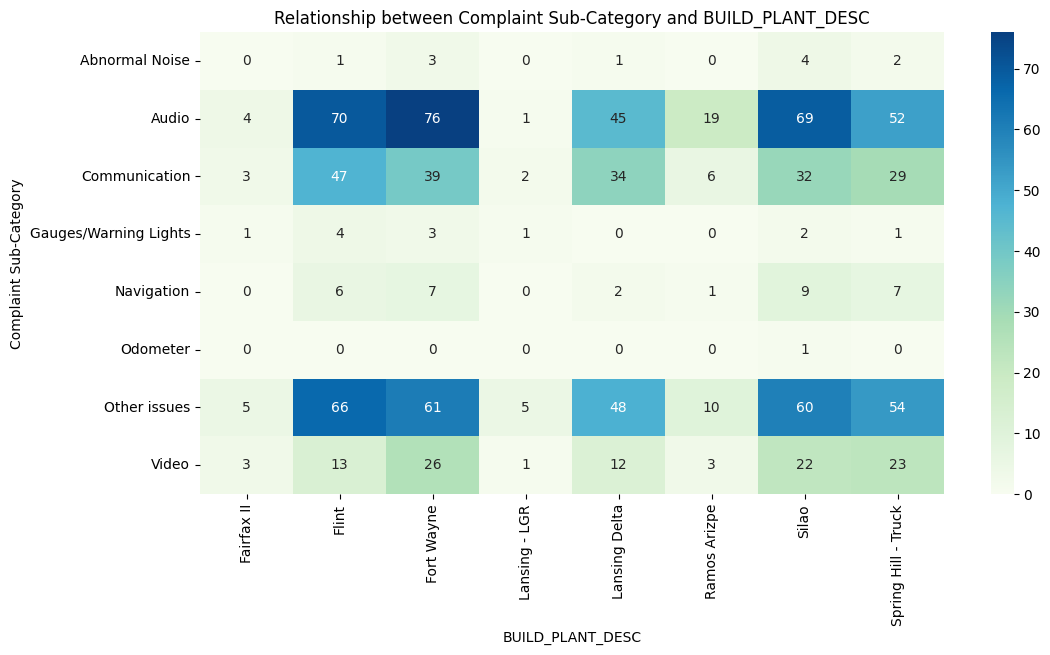

In [ ]:
# Correlation between Complaint Sub-Category and BUILD_PLANT_DESC

pivot_table = raw_data_t3.pivot_table(index='COMPLAINT_CD_DESC_sub_category', columns='BUILD_PLANT_DESC', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between Complaint Sub-Category and BUILD_PLANT_DESC')
ax.set_xlabel('BUILD_PLANT_DESC')
ax.set_ylabel('Complaint Sub-Category')

# Rotate the x-axis labels
plt.xticks(rotation=90)


# FOrt Wayne tops with the maximum number of complaints registered from its make.
# While Audio with 76 units has the lion's share, it is closely followed by Other issues with 61 cases. There is no case related to Odometer.
# Flint with second highest issues follows the similar pattern.
# Across the compaint sub-categories, as evident, Audio has the highest share followed by Other issues and Communication related problems.
# Interestingly, there is a mere single complaint related to Odometer from Silao.
# Abnormal voice is next to Odometer in the least reported complaints with just 11 cases.
# Navigation and Gauges/Warning Lights are the other two lows with just 32 and 12 cases respectively.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0.5, 0, 'AeroSpecter'),
  Text(1.5, 0, 'AstroStinger'),
  Text(2.5, 0, 'CelestialVortex'),
  Text(3.5, 0, 'CosmicRipple'),
  Text(4.5, 0, 'ElectroStreak'),
  Text(5.5, 0, 'FusionNova'),
  Text(6.5, 0, 'GalacticRoamer'),
  Text(7.5, 0, 'HyperFury X'),
  Text(8.5, 0, 'InfernoSprint'),
  Text(9.5, 0, 'InfinityRider'),
  Text(10.5, 0, 'MirageQuest'),
  Text(11.5, 0, 'NebulaJet'),
  Text(12.5, 0, 'OrionScout'),
  Text(13.5, 0, 'PhotonChaser'),
  Text(14.5, 0, 'QuantumGlider'),
  Text(15.5, 0, 'QuantumRider'),
  Text(16.5, 0, 'ShadowPulse'),
  Text(17.5, 0, 'SolarStriker'),
  Text(18.5, 0, 'StellarGlide'),
  Text(19.5, 0, 'ThunderBlitz'),
  Text(20.5, 0, 'TurboFlare'),
  Text(21.5, 0, 'WarpDriveX'),
  Text(22.5, 0, 'ZenithCruiser')])

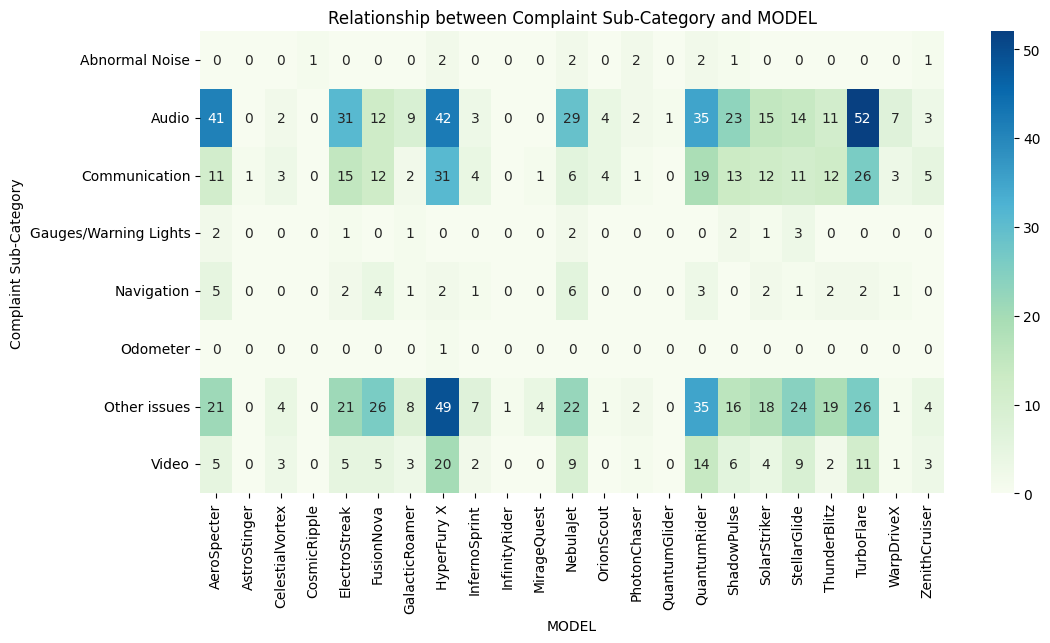

In [ ]:
# Correlation between Complaint Sub-Category and MODEL

pivot_table = raw_data_t3.pivot_table(index='COMPLAINT_CD_DESC_sub_category', columns='MODEL', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between Complaint Sub-Category and MODEL')
ax.set_xlabel('MODEL')
ax.set_ylabel('Complaint Sub-Category')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# As expected, HyperFury X faces the maximum complaints, proportionate to its volume in the overall dataset.
# It follows the same trend as its Manufacturer, ThunderVolt it terms of complaints related to Other Issues
# and Audio holding the top 2 spots. Interestingly, the only Odometer related complaint is related to ThunderVolt, with its building plant being Silao.
# However, TurboFlare reported more complaints regarding to Audio as compared to HyperFury X.


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Fairfax II'),
  Text(1.5, 0, 'Flint'),
  Text(2.5, 0, 'Fort Wayne'),
  Text(3.5, 0, 'Lansing - LGR'),
  Text(4.5, 0, 'Lansing Delta'),
  Text(5.5, 0, 'Ramos Arizpe'),
  Text(6.5, 0, 'Silao'),
  Text(7.5, 0, 'Spring Hill - Truck')])

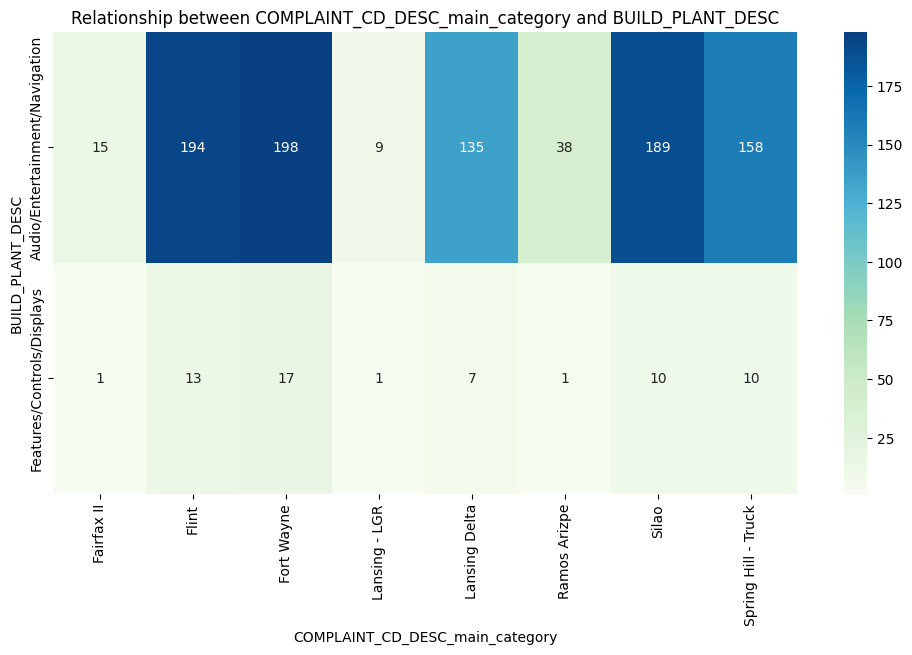

In [ ]:
# correlation between COMPLAINT_CD_DESC_main_category and BUILD_PLANT_DESC


pivot_table = raw_data_t3.pivot_table(index='COMPLAINT_CD_DESC_main_category', columns='BUILD_PLANT_DESC', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between COMPLAINT_CD_DESC_main_category and BUILD_PLANT_DESC')
ax.set_xlabel('COMPLAINT_CD_DESC_main_category')
ax.set_ylabel('BUILD_PLANT_DESC')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Fort Wayne Plant has the highest complaints related to Audio/Entertainment/Navigation, closely followed by Flint and Silao.
# The same trend is followed in the other category of Features/Controls/Displays.

Text(120.7222222222222, 0.5, 'MAKE')

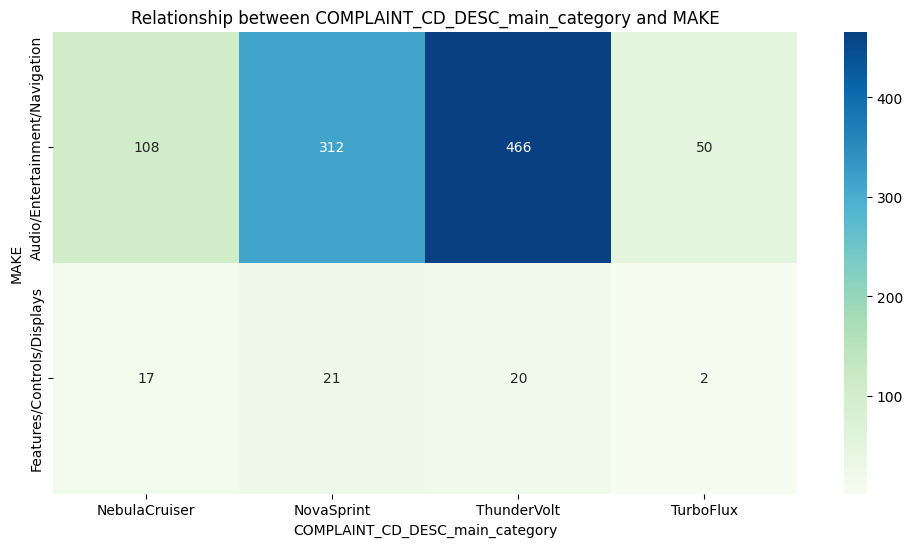

In [ ]:
# correlation between COMPLAINT_CD_DESC_main_category and MAKE


pivot_table = raw_data_t3.pivot_table(index='COMPLAINT_CD_DESC_main_category', columns='MAKE', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between COMPLAINT_CD_DESC_main_category and MAKE')
ax.set_xlabel('COMPLAINT_CD_DESC_main_category')
ax.set_ylabel('MAKE')

# ThunderVolt has the highest number of Audio/Entertainment/Navigation related complaints followed by NovaSprint.
# Interestingly, NovaSprint has more complaints related to Features/Controls/Displays as compared to ThunderVolt.

Text(120.7222222222222, 0.5, 'MODEL')

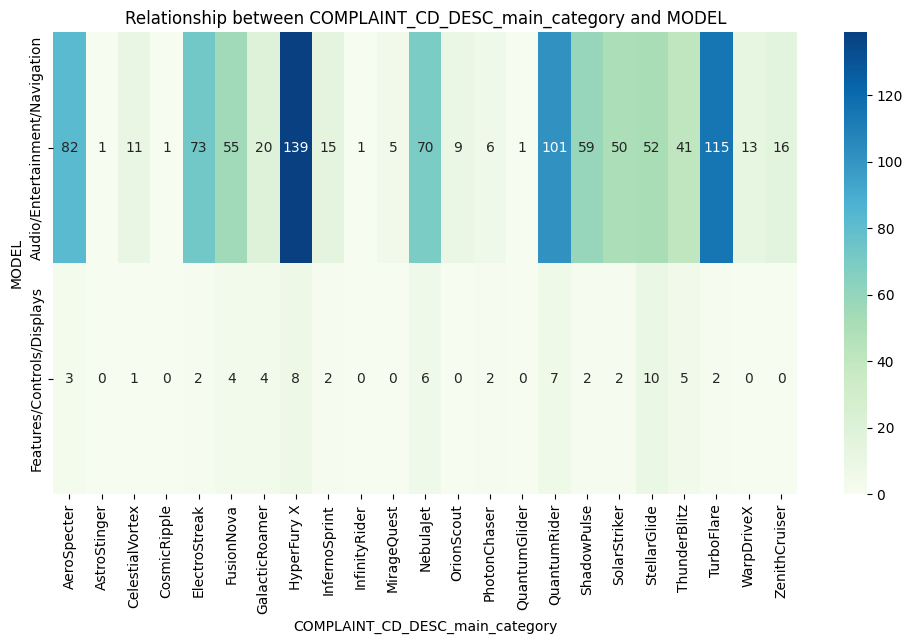

In [ ]:
# correlation between COMPLAINT_CD_DESC_main_category and MODEL


pivot_table = raw_data_t3.pivot_table(index='COMPLAINT_CD_DESC_main_category', columns='MODEL', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between COMPLAINT_CD_DESC_main_category and MODEL')
ax.set_xlabel('COMPLAINT_CD_DESC_main_category')
ax.set_ylabel('MODEL')

Text(120.7222222222222, 0.5, 'BUILD_PLANT_DESC')

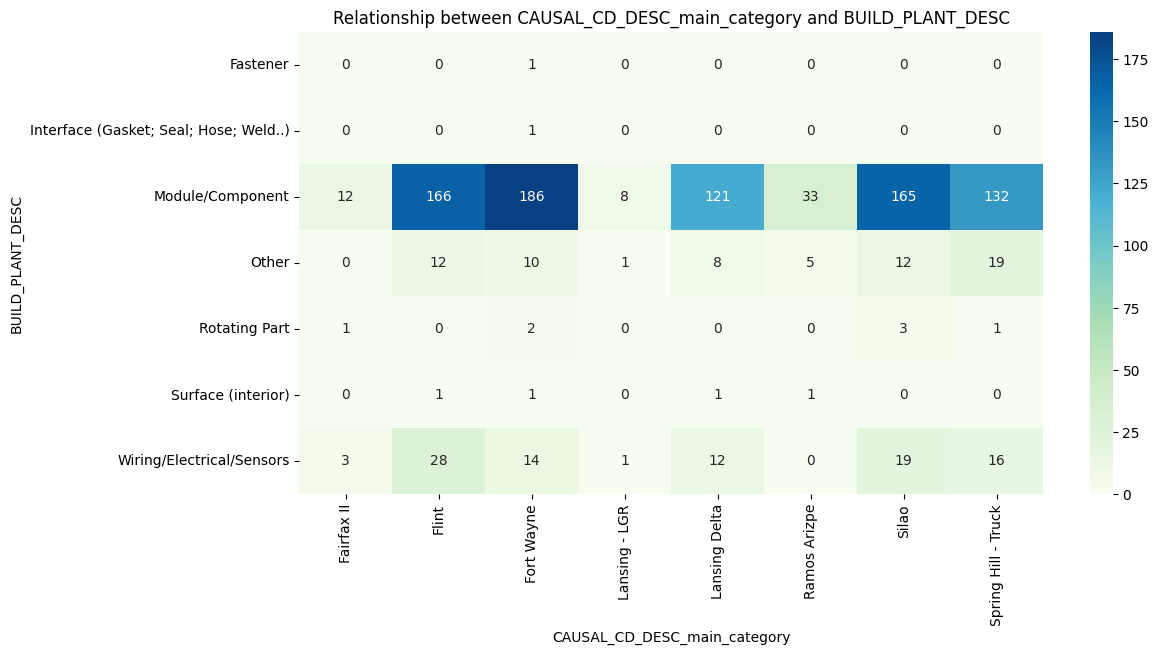

In [ ]:
# correlation between # correlation between CAUSAL_CD_DESC_main_category and BUILD_PLANT_DESC


pivot_table = raw_data_t3.pivot_table(index='CAUSAL_CD_DESC_main_category', columns='BUILD_PLANT_DESC', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between CAUSAL_CD_DESC_main_category and BUILD_PLANT_DESC')
ax.set_xlabel('CAUSAL_CD_DESC_main_category')
ax.set_ylabel('BUILD_PLANT_DESC')


Text(120.7222222222222, 0.5, 'MAKE')

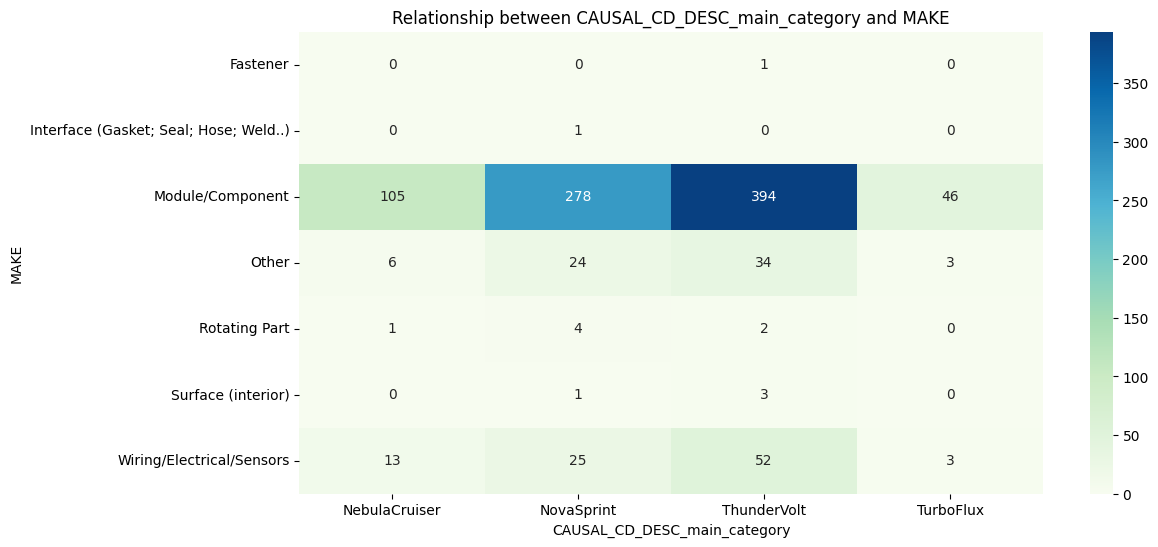

In [ ]:
# CORRELATION CAUSAL_CD_DESC_main_category and MAKE

pivot_table = raw_data_t3.pivot_table(index='CAUSAL_CD_DESC_main_category', columns='MAKE', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between CAUSAL_CD_DESC_main_category and MAKE')
ax.set_xlabel('CAUSAL_CD_DESC_main_category')
ax.set_ylabel('MAKE')

Text(120.7222222222222, 0.5, 'MODEL')

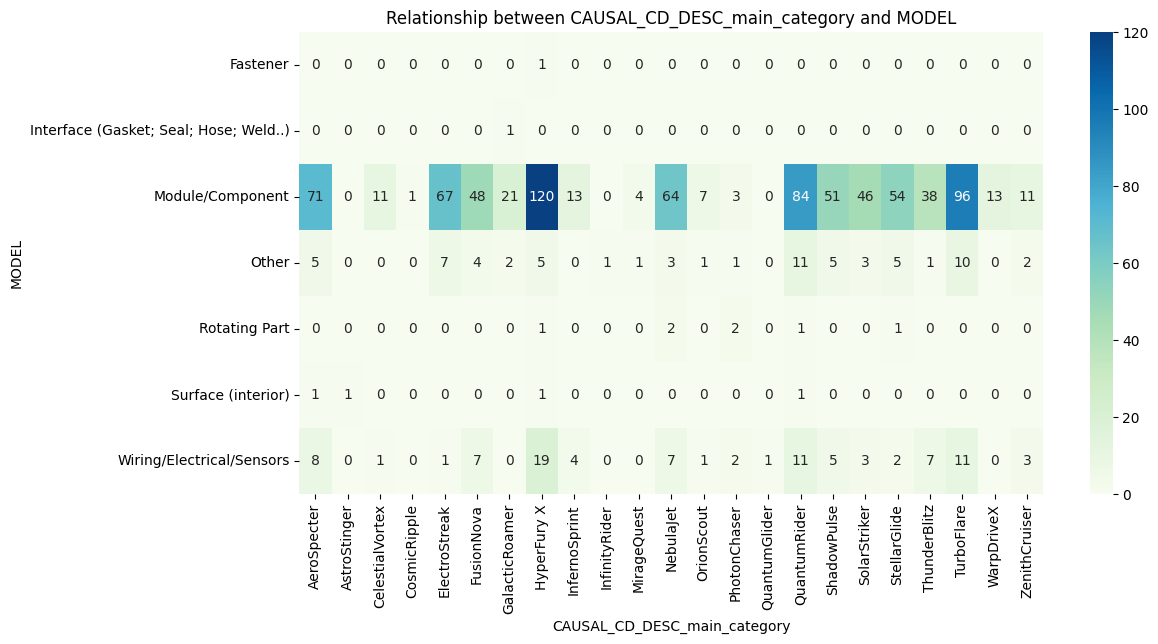

In [ ]:
# CORRELATION CAUSAL_CD_DESC_main_category and MODEL

pivot_table = raw_data_t3.pivot_table(index='CAUSAL_CD_DESC_main_category', columns='MODEL', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between CAUSAL_CD_DESC_main_category and MODEL')
ax.set_xlabel('CAUSAL_CD_DESC_main_category')
ax.set_ylabel('MODEL')

Text(120.7222222222222, 0.5, 'BUILD_PLANT_DESC')

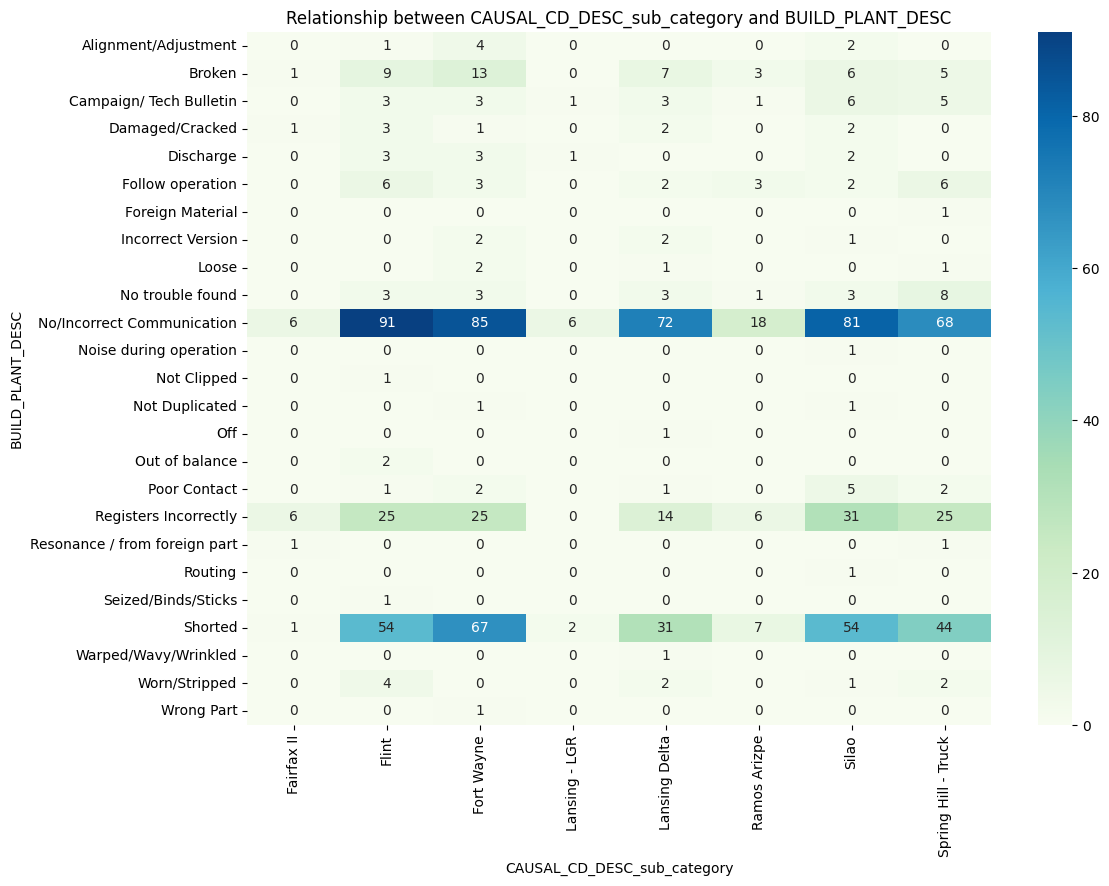

In [ ]:
# CORRELATION CAUSAL_CD_DESC_sub_category and BUILD_CITY_DESC

pivot_table = raw_data_t3.pivot_table(index='CAUSAL_CD_DESC_sub_category', columns='BUILD_PLANT_DESC', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between CAUSAL_CD_DESC_sub_category and BUILD_PLANT_DESC')
ax.set_xlabel('CAUSAL_CD_DESC_sub_category')
ax.set_ylabel('BUILD_PLANT_DESC')

Text(120.7222222222222, 0.5, 'MAKE')

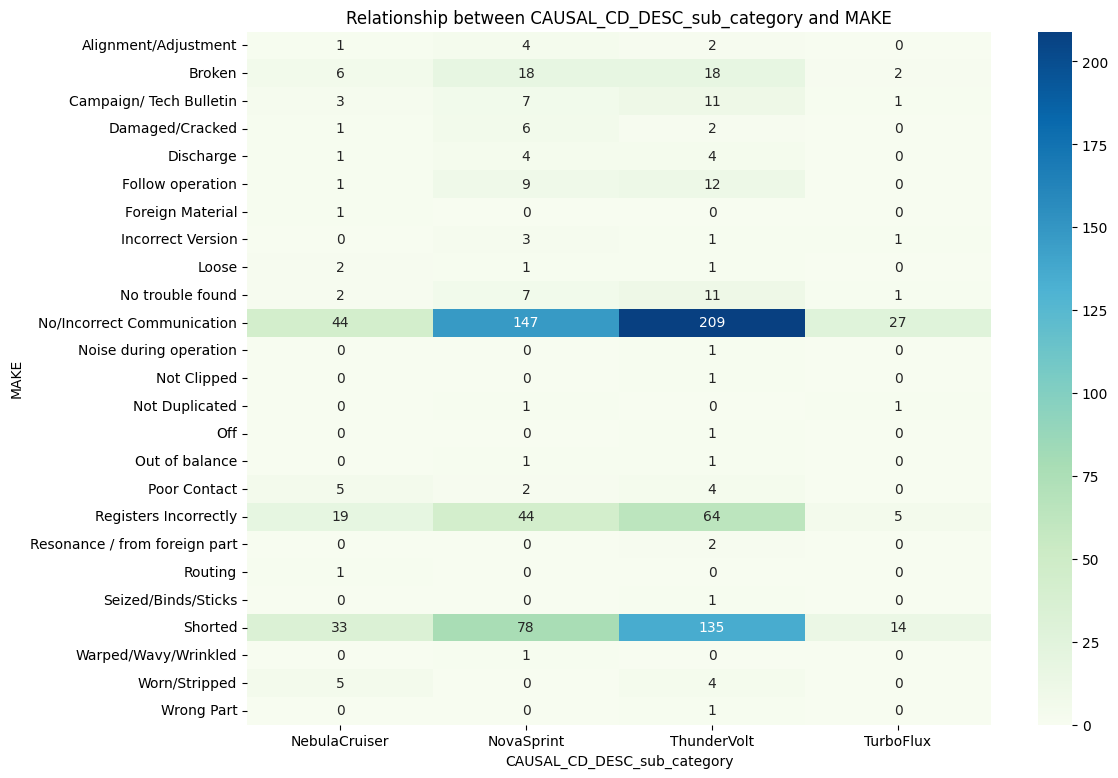

In [ ]:
# CORRELATION CAUSAL_CD_DESC_sub_category and MAKE

pivot_table = raw_data_t3.pivot_table(index='CAUSAL_CD_DESC_sub_category', columns='MAKE', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between CAUSAL_CD_DESC_sub_category and MAKE')
ax.set_xlabel('CAUSAL_CD_DESC_sub_category')
ax.set_ylabel('MAKE')

Text(120.7222222222222, 0.5, 'MODEL')

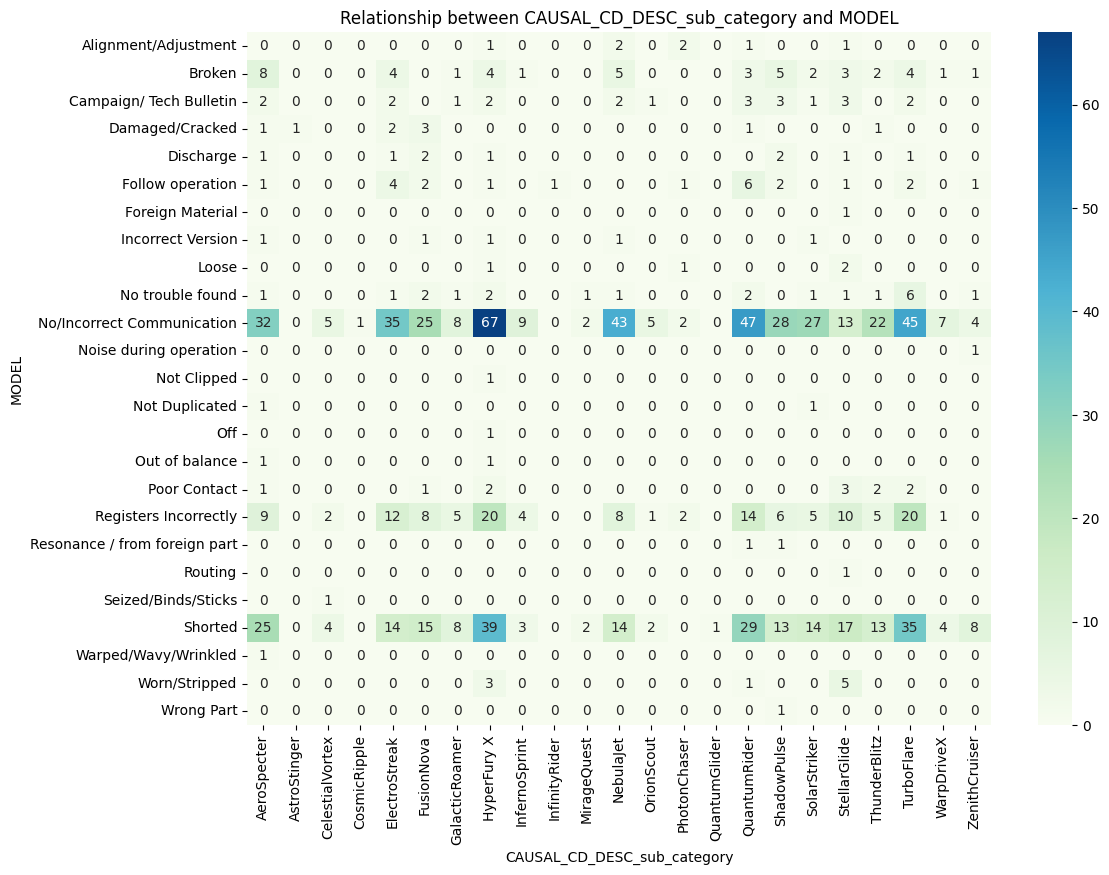

In [ ]:
# CORRELATION CAUSAL_CD_DESC_sub_category and MODEL

pivot_table = raw_data_t3.pivot_table(index='CAUSAL_CD_DESC_sub_category', columns='MODEL', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between CAUSAL_CD_DESC_sub_category and MODEL')
ax.set_xlabel('CAUSAL_CD_DESC_sub_category')
ax.set_ylabel('MODEL')

Text(120.7222222222222, 0.5, 'CAUSAL_CD_DESC_sub_category')

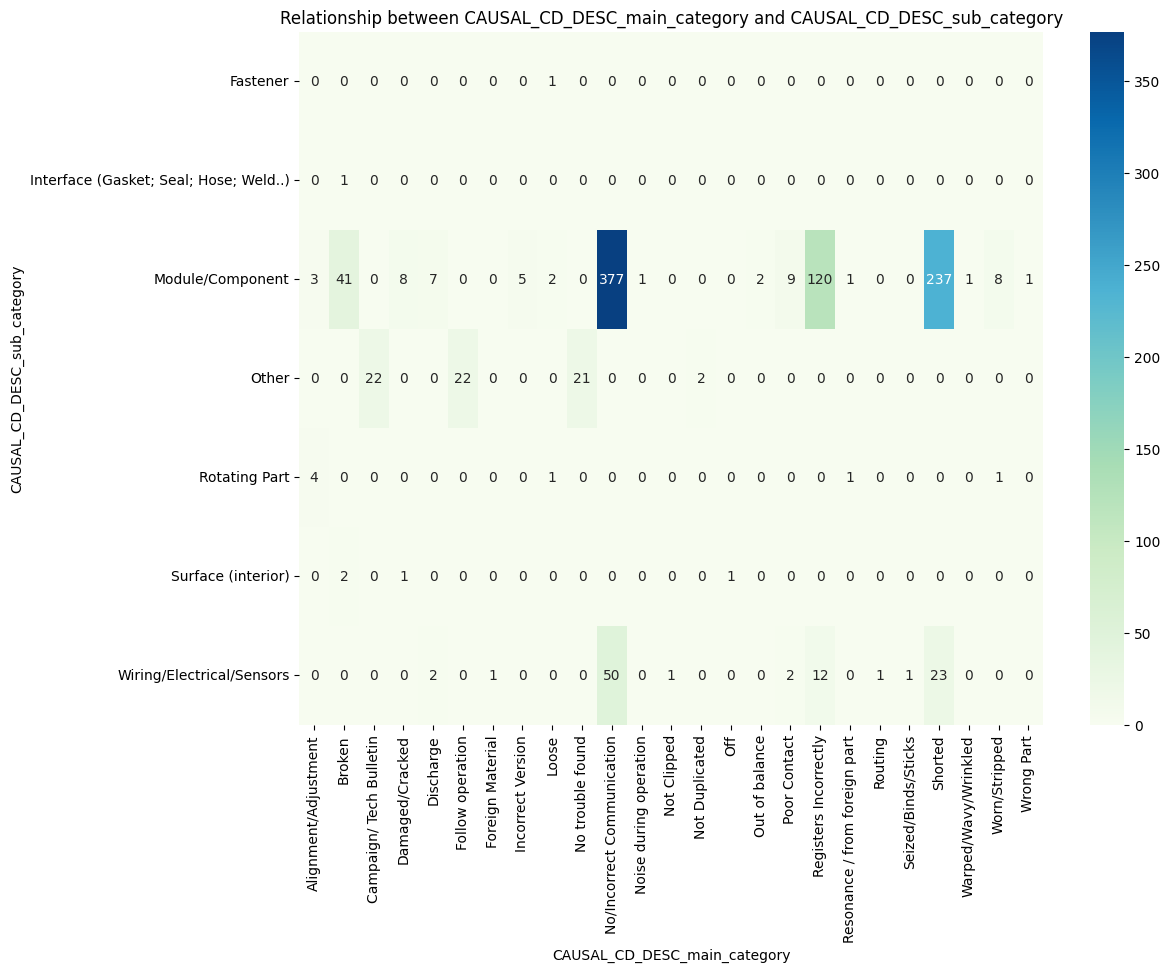

In [ ]:
# CORRELATION CAUSAL_CD_DESC_sub_category and CAUSAL_CD_DESC_main_category

pivot_table = raw_data_t3.pivot_table(index='CAUSAL_CD_DESC_main_category', columns='CAUSAL_CD_DESC_sub_category', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between CAUSAL_CD_DESC_main_category and CAUSAL_CD_DESC_sub_category')
ax.set_xlabel('CAUSAL_CD_DESC_main_category')
ax.set_ylabel('CAUSAL_CD_DESC_sub_category')

Text(120.7222222222222, 0.5, 'COMPLAINT_CD_DESC_sub_category')

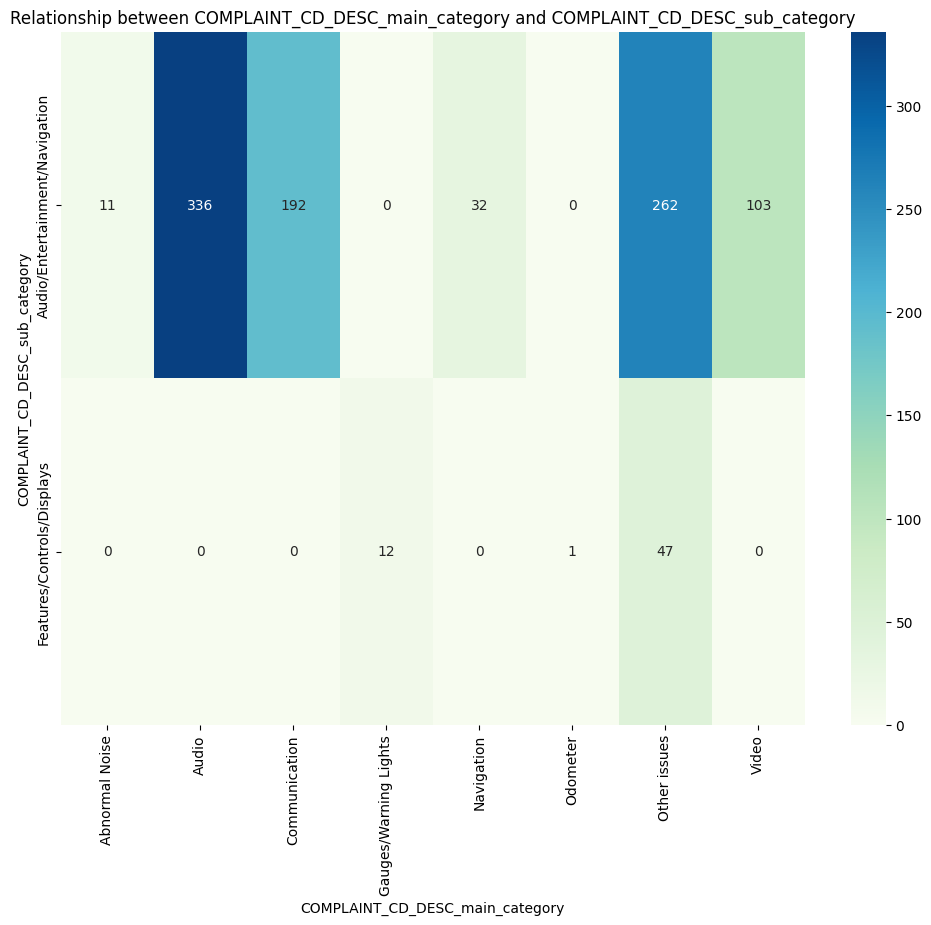

In [ ]:
# CORRELATION COMPLAINT_CD_DESC_sub_category and COMPLAINT_CD_DESC_main_category

pivot_table = raw_data_t3.pivot_table(index='COMPLAINT_CD_DESC_main_category', columns='COMPLAINT_CD_DESC_sub_category', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between COMPLAINT_CD_DESC_main_category and COMPLAINT_CD_DESC_sub_category')
ax.set_xlabel('COMPLAINT_CD_DESC_main_category')
ax.set_ylabel('COMPLAINT_CD_DESC_sub_category')

Text(120.7222222222222, 0.5, 'COMPLAINT_CD_DESC_sub_category')

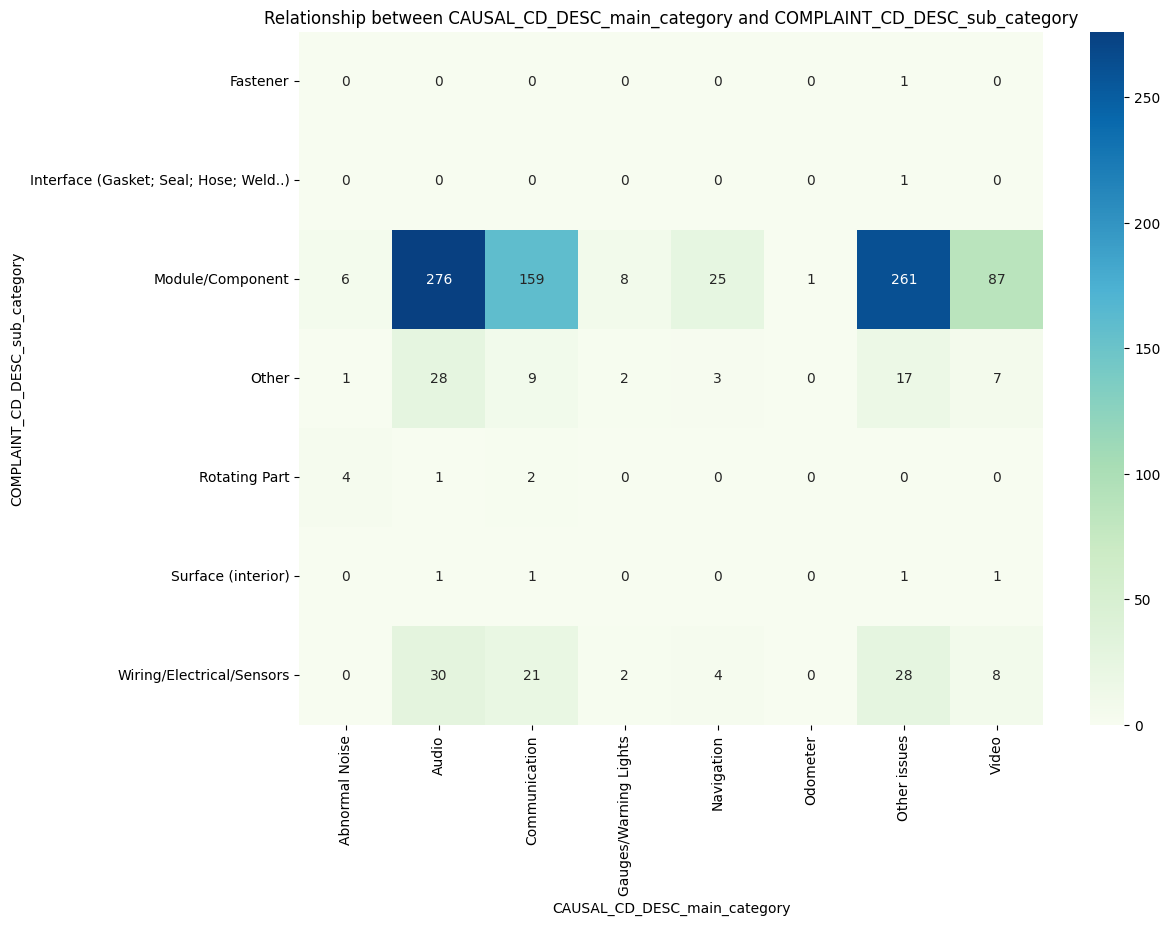

In [ ]:
# CORRELATION COMPLAINT_CD_DESC_sub_category and CAUSAL_CD_DESC_main_category

pivot_table = raw_data_t3.pivot_table(index='CAUSAL_CD_DESC_main_category', columns='COMPLAINT_CD_DESC_sub_category', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between CAUSAL_CD_DESC_main_category and COMPLAINT_CD_DESC_sub_category')
ax.set_xlabel('CAUSAL_CD_DESC_main_category')
ax.set_ylabel('COMPLAINT_CD_DESC_sub_category')

Text(120.7222222222222, 0.5, 'CAUSAL_CD_DESC_sub_category')

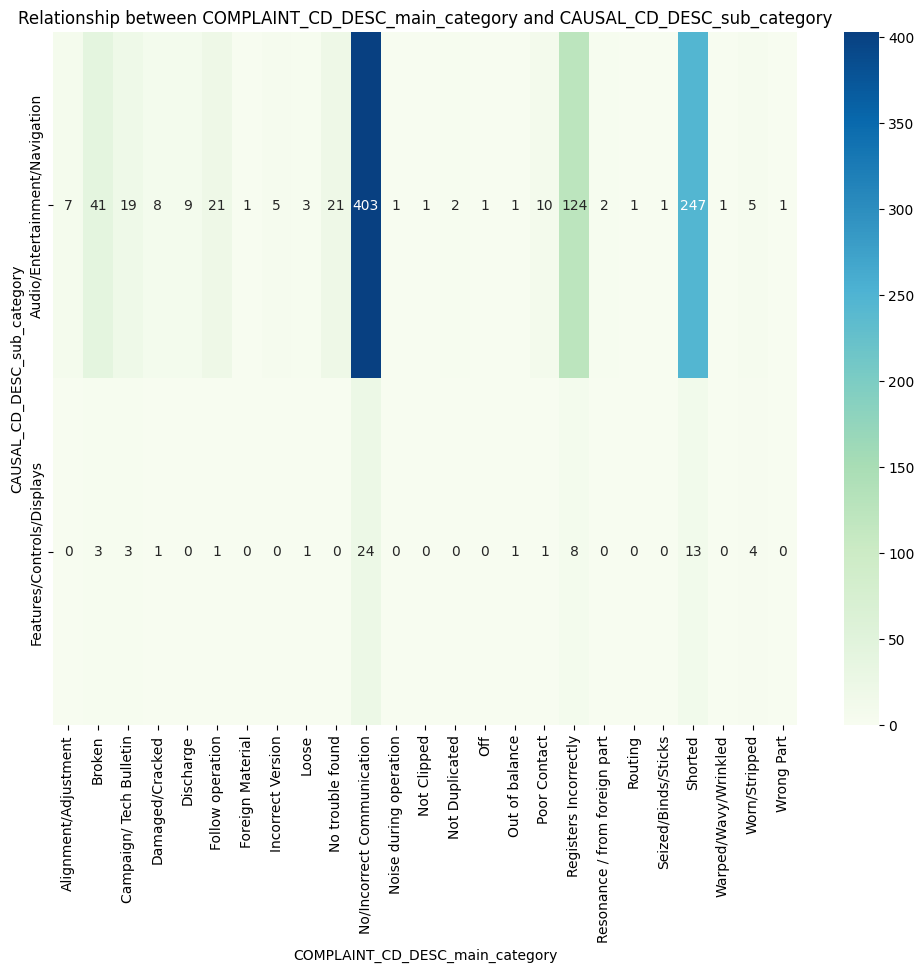

In [ ]:
# CORRELATION COMPLIANT_CD_DESC_sub_category and CAUSAL_CD_DESC_main_category

pivot_table = raw_data_t3.pivot_table(index='COMPLAINT_CD_DESC_main_category', columns='CAUSAL_CD_DESC_sub_category', aggfunc='size',fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between COMPLAINT_CD_DESC_main_category and CAUSAL_CD_DESC_sub_category')
ax.set_xlabel('COMPLAINT_CD_DESC_main_category')
ax.set_ylabel('CAUSAL_CD_DESC_sub_category')

Text(120.7222222222222, 0.5, 'CAUSAL_CD_DESC_sub_category')

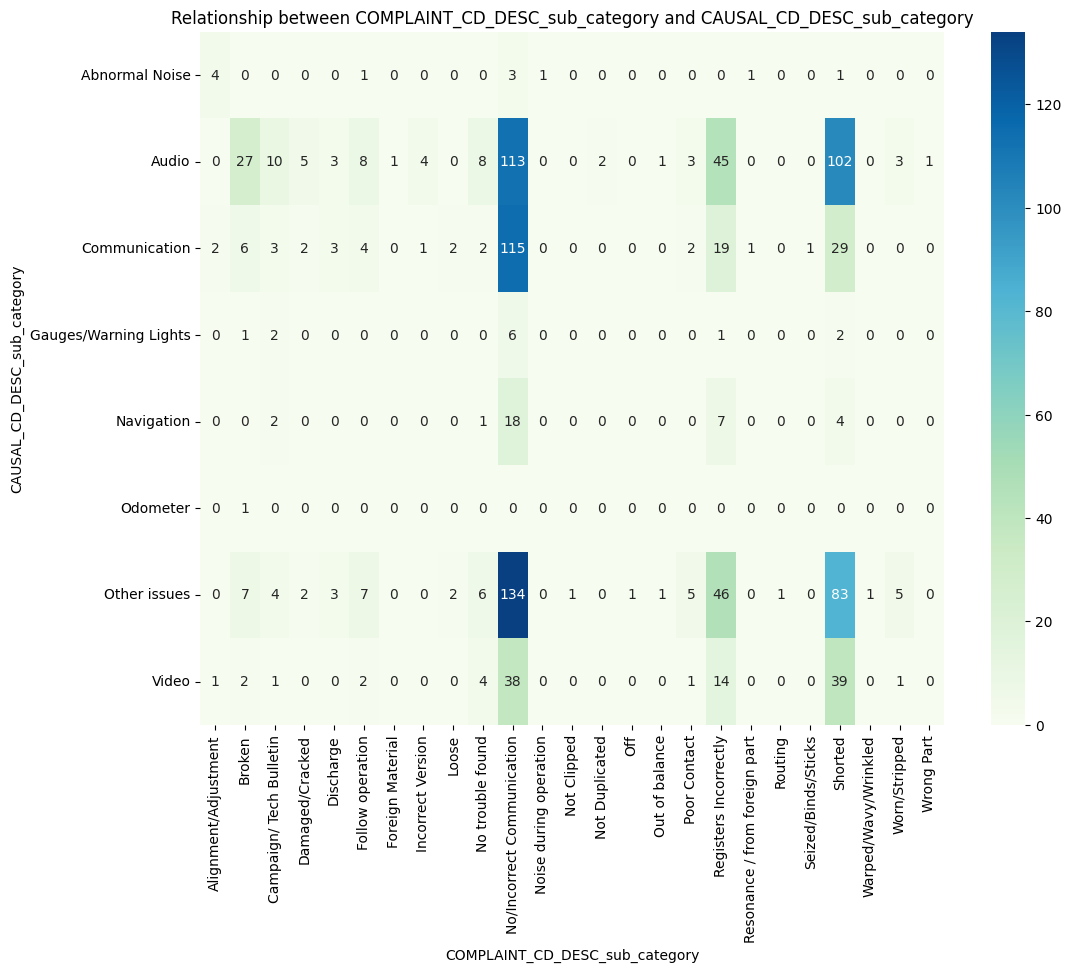

In [ ]:
# CORRELATION COMPLIANT_CD_DESC_sub_category and CAUSAL_CD_DESC_sub_category

pivot_table = raw_data_t3.pivot_table(index='COMPLAINT_CD_DESC_sub_category', columns='CAUSAL_CD_DESC_sub_category', aggfunc='size',fill_value=0)
# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, cmap='GnBu',fmt='.0f',ax=ax)

# Set the title and axis labels
ax.set_title('Relationship between COMPLAINT_CD_DESC_sub_category and CAUSAL_CD_DESC_sub_category')
ax.set_xlabel('COMPLAINT_CD_DESC_sub_category')
ax.set_ylabel('CAUSAL_CD_DESC_sub_category')

# **TASK 3: Tagged Data**

In [ ]:
tag_data_t3=pd.read_excel('/content/drive/MyDrive/DATA SCIENCE/SA - Industrial Assessment - Data Sheet -Task 3.xlsx',sheet_name='Task 3 Tagged Data')

In [ ]:
tag_data_t3.sample(10)

,Event id,Trigger,Failure Component,Failure Condition,Additional Context,Failure Mode,Fix Component,Fix Condition,Fix/Resolution
723,D-14932,['No Additional Functionality'],"['Radio', 'Radio']","['Malfunction', 'Internal Fault']",['No Additional Context'],"['Radio - Malfunction', 'Radio - Internal Fault']",['Radio'],['Replaced'],['Radio - Replaced']
716,D-14937,['No Additional Functionality'],['Audio Unit'],['No Sound'],['No Additional Context'],['Audio Unit - No Sound'],"['Radio', 'Radio']","['Replaced', 'Programmed']","['Radio - Replaced', 'Radio - Programmed']"
381,D-15274,['No Additional Functionality'],['XM Satellite Signal'],['Malfunction'],['No Additional Context'],['XM Satellite Signal - Malfunction'],"['Radio', 'Radio']","['Replaced', 'Programmed']","['Radio - Replaced', 'Radio - Programmed']"
966,D-14691,['No Additional Functionality'],['Display'],['Inoperative'],['No Additional Context'],['Display - Inoperative'],['Unit'],['Replaced'],['Unit - Replaced']
414,D-15239,['While Using Bluetooth'],['Radio'],['No Sound'],['No Additional Context'],['Radio - No Sound'],"['Radio', 'SPS']","['Replaced', 'Programmed']","['Radio - Replaced', 'SPS - Programmed']"
482,D-15171,['No Additional Functionality'],['Radio'],['Stuck'],['No Additional Context'],['Radio - Stuck'],['Radio'],['Replaced'],['Radio - Replaced']
286,D-15370,['No Additional Functionality'],"['Radio', 'Radio']","['No Sound', 'Internal Fault']",['While Driving'],"['Radio - No Sound', 'Radio - Internal Fault']","['Radio', 'USB']","['Replaced', 'Programmed']","['Radio - Replaced', 'USB - Programmed']"
632,D-15023,['No Additional Functionality'],['Radio'],['Unable To Update'],['No Additional Context'],['Radio - Unable To Update'],"['Battery', 'Body Control Module', 'Radio', 'U...","['Replaced', 'Replaced', 'Replaced', 'Programm...","['Battery - Replaced', 'Body Control Module - ..."
323,D-15334,['When Reversing'],"['Display', 'Touch Screen', 'Radio']","['Freezing', 'Unresponsive', 'Internal Fault']",['No Additional Context'],"['Display - Freezing', 'Touch Screen - Unrespo...","['Radio', 'Radio']","['Replaced', 'Programmed']","['Radio - Replaced', 'Radio - Programmed']"
569,D-15086,['No Additional Functionality'],['Display'],['Black Screen'],['No Additional Context'],['Display - Black Screen'],"['Radio', 'USB', 'Radio Module']","['Replaced', 'Programmed', 'Programmed']","['Radio - Replaced', 'USB - Programmed', 'Radi..."


In [ ]:
# EDA - Exploratory Data Analysis
tag_data_t3.info() # column name, count, datatype

print(tag_data_t3.columns) # column names

print(tag_data_t3.dtypes) # column datatypes

print(tag_data_t3.nunique()) # unique values in each column

print(tag_data_t3.isnull().sum()) # sum of all the null values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Event id            1000 non-null   object
 1   Trigger             1000 non-null   object
 2   Failure Component   1000 non-null   object
 3   Failure Condition   1000 non-null   object
 4   Additional Context  1000 non-null   object
 5   Failure Mode        1000 non-null   object
 6   Fix Component       1000 non-null   object
 7   Fix Condition       1000 non-null   object
 8   Fix/Resolution      1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB
Index(['Event id', 'Trigger', 'Failure Component', 'Failure Condition',
       'Additional Context', 'Failure Mode', 'Fix Component', 'Fix Condition',
       'Fix/Resolution'],
      dtype='object')
Event id              object
Trigger               object
Failure Component     object
Failure Condition     object
Additional 

In [ ]:
tag_data_t3['Trigger'].value_counts()

Trigger
['No Additional Functionality']                                  910
['While Turning ON']                                              36
['While Using Remote Start']                                      13
['While Using Navigation']                                         5
['When Reversing']                                                 5
['While Using Backup Camera']                                      4
['While Using Radio']                                              4
['While Turning Off Vehicle']                                      3
['While Using Bluetooth']                                          3
['While Using Satellite Radio']                                    3
['When Plugged To Phone']                                          2
['While Using Handsfree', 'While Using USB Cord']                  1
['While Using Handsfree']                                          1
['While Using Camera']                                             1
['While Changing Channels'

In [ ]:
tag_data_t3['Failure Mode'].value_counts() # comprises Failure Component [-]  Failure Condition

Failure Mode
['Radio - Inoperative']                                                            70
['Display - Black Screen']                                                         68
['Radio - Malfunction']                                                            35
['Radio - Internal Fault']                                                         27
['Radio - No Sound']                                                               25
                                                                                   ..
['Display - Freezing', 'Touch Screen - Unresponsive', 'Radio - Internal Fault']     1
['Radio - Malfunction', 'OnStar - Loss of Communication']                           1
['Radio - No Sound', 'Radio - Stays On', 'Radio - Internal Fault']                  1
['Display - Black Screen', 'Display - Black Screen']                                1
['Radio - No Sound', 'Radio - Inoperative', 'Radio - Internal Fault']               1
Name: count, Length: 419, dtype: int64

In [ ]:
tag_data_t3['Failure Condition'].value_counts()

Failure Condition
['Inoperative']                                                       143
['Black Screen']                                                       69
['Malfunction']                                                        68
['Inoperative', 'Internal Fault']                                      38
['Internal Fault']                                                     28
                                                                     ... 
['Not Shutting Down', 'Malfunction', 'Inoperative', 'Inoperative']      1
['Freezing', 'Unable To Update']                                        1
['No Sound', 'Freezing']                                                1
['Not Shutting Down', 'Stays On']                                       1
['Inoperative', 'Shorted', 'Malfunction']                               1
Name: count, Length: 233, dtype: int64

In [ ]:
tag_data_t3['Failure Component'].value_counts() # Failure Mode has component written as well

Failure Component
['Radio']                                    254
['Radio', 'Radio']                           106
['Display']                                  100
['Display', 'Radio']                          72
['Radio', 'Display']                          51
                                            ... 
['Bluetooth', 'Bluetooth']                     1
['Radio', 'Display', 'Audio Unit']             1
['Radio', 'Cruise Control', 'Display']         1
['Radio', 'Front View Camera', 'Display']      1
['SD Card', 'Navigation']                      1
Name: count, Length: 190, dtype: int64

In [ ]:
# Multi-indexing to categorise the data properly

tag_data_t3['Fix/Resolution'].value_counts() # comprises fix to Failure Component + Failure Condition

Fix/Resolution
['Radio - Replaced', 'USB - Programmed']                                                         276
['Radio - Replaced']                                                                             226
['Radio - Replaced', 'Radio - Programmed']                                                       139
['Radio - Replaced', 'SPS - Programmed', 'USB - Programmed']                                      33
['Radio - Replaced', 'SPS - Programmed']                                                          26
                                                                                                ... 
['Battery - Replaced']                                                                             1
['Radio - Replaced', 'SPS - Updated']                                                              1
['Radio Control Module - Adjusted']                                                                1
['Radio - Reseated']                                                        

In [ ]:
tag_data_t3['Fix Component'].value_counts()

Fix Component
['Radio', 'USB']                                 283
['Radio']                                        242
['Radio', 'Radio']                               143
['Radio', 'SPS', 'USB']                           33
['Radio', 'USB', 'USB']                           31
                                                ... 
['Navigation Card', 'Radio', 'USB']                1
['Radio', 'Display', 'OnStar']                     1
['Radio Control Assembly', 'Radio']                1
['Radio Control Module', 'Radio']                  1
['X83 Auxiliary Port', 'Radio', 'SPS', 'USB']      1
Name: count, Length: 137, dtype: int64

In [ ]:
tag_data_t3['Fix Condition'].value_counts()

Fix Condition
['Replaced', 'Programmed']                              484
['Replaced']                                            264
['Replaced', 'Programmed', 'Programmed']                110
['Replaced', 'Replaced']                                 17
['Programmed']                                           10
                                                       ... 
['Replaced', 'Programmed', 'Programmed', 'Replaced']      1
['Updated', 'Replaced']                                   1
['Reset']                                                 1
['Removed', 'Cleaned']                                    1
['Replaced', 'Replaced', 'Replaced', 'Removed']           1
Name: count, Length: 61, dtype: int64

In [ ]:
tag_data_t3['Additional Context'].value_counts()

Additional Context
['No Additional Context']         927
['While Driving']                  43
['When Reversing']                 11
['After Opening Door']              9
['After Update']                    2
['After Driving']                   2
['After Onstar Activation']         1
['After Battery Boosted']           1
['After Replacing CUE Screen']      1
['When It Was Cold']                1
['When Hot Outside']                1
['After Replacing Battery']         1
Name: count, dtype: int64

In [ ]:
tag_data_t3

,Event id,Trigger,Failure Component,Failure Condition,Additional Context,Failure Mode,Fix Component,Fix Condition,Fix/Resolution
0,D-14653,['While Using Sirius XM'],['Radio'],['Malfunction'],['No Additional Context'],['Radio - Malfunction'],"['Radio', 'SPS Port', 'USB', 'MEC Counter']","['Replaced', 'Programmed', 'Programmed', 'Reset']","['Radio - Replaced', 'SPS Port - Programmed', ..."
1,D-14652,['While Turning ON'],['Display'],['Black Screen'],['No Additional Context'],['Display - Black Screen'],"['Radio', 'Radio']","['Replaced', 'Programmed']","['Radio - Replaced', 'Radio - Programmed']"
2,D-14654,['No Additional Functionality'],['Radio'],['Shorted'],['No Additional Context'],['Radio - Shorted'],"['Radio', 'USB']","['Replaced', 'Programmed']","['Radio - Replaced', 'USB - Programmed']"
3,D-14655,['No Additional Functionality'],"['Radio', 'OnStar']","['No Sound', 'Inoperative']",['No Additional Context'],"['Radio - No Sound', 'OnStar - Inoperative']",['Radio'],['Replaced'],['Radio - Replaced']
4,D-14650,['No Additional Functionality'],"['Radio', 'Radio']","['Inoperative', 'Internal Fault']",['While Driving'],"['Radio - Inoperative', 'Radio - Internal Fault']","['Radio', 'USB']","['Replaced', 'Programmed']","['Radio - Replaced', 'USB - Programmed']"
...,...,...,...,...,...,...,...,...,...
995,D-14657,['No Additional Functionality'],['Radio'],['Inoperative'],['No Additional Context'],['Radio - Inoperative'],"['Radio', 'Radio']","['Replaced', 'Programmed']","['Radio - Replaced', 'Radio - Programmed']"
996,D-14661,['No Additional Functionality'],"['Touch Screen', 'Radio']","['Inoperative', 'No Sound']",['No Additional Context'],"['Touch Screen - Inoperative', 'Radio - No Sou...","['Radio', 'USB']","['Replaced', 'Programmed']","['Radio - Replaced', 'USB - Programmed']"
997,D-14658,['No Additional Functionality'],"['Radio', 'Display']","['Inoperative', 'Black Screen']",['No Additional Context'],"['Radio - Inoperative', 'Display - Black Screen']",['Radio'],['Replaced'],['Radio - Replaced']
998,D-14660,['No Additional Functionality'],"['Radio', 'Radio', 'Radio']","['No Sound', 'Inoperative', 'Internal Fault']",['No Additional Context'],"['Radio - No Sound', 'Radio - Inoperative', 'R...","['Radio', 'USB']","['Replaced', 'Programmed']","['Radio - Replaced', 'USB - Programmed']"


In [ ]:
# converting categorical columns into correct format

# trigger
#tag_data_t3['Trigger'].str.replace("['",'').str.replace("']","").str.split(',').str.strip("[")


In [ ]:
tag_data_t3['Trigger'].str.strip('[').str.strip(']').str.strip("'").str.split(",",expand=True, n=1)


#tag_data_t3['Trigger']

,0,1
0,While Using Sirius XM,None
1,While Turning ON,None
2,No Additional Functionality,None
3,No Additional Functionality,None
4,No Additional Functionality,None
...,...,...
995,No Additional Functionality,None
996,No Additional Functionality,None
997,No Additional Functionality,None
998,No Additional Functionality,None


In [ ]:
# Extract the individual categories and create separate columns
tag_data_t3[['Trigger_1', 'Trigger_2']] = tag_data_t3['Trigger'].str.strip('[]').str.strip("' ").str.split(',', expand=True, n=1)

# Remove the leading/trailing spaces from the values
tag_data_t3['Trigger_1'] = tag_data_t3['Trigger_1'].str.strip("'")
tag_data_t3['Trigger_2'] = tag_data_t3['Trigger_2'].str.strip("'").str.strip("'")

In [ ]:
tag_data_t3['Trigger_2'].str.strip("'w").value_counts()

Trigger_2
 'While Using Remote Start    1
 'While Using USB Cord        1
Name: count, dtype: int64

In [ ]:
tag_data_t3['Failure Condition'].str.strip('[]').str.strip("'").str.split(',', expand=True, n=3)
tag_data_t3['Failure Condition'].value_counts()

Failure Condition
['Inoperative']                                                       143
['Black Screen']                                                       69
['Malfunction']                                                        68
['Inoperative', 'Internal Fault']                                      38
['Internal Fault']                                                     28
                                                                     ... 
['Not Shutting Down', 'Malfunction', 'Inoperative', 'Inoperative']      1
['Freezing', 'Unable To Update']                                        1
['No Sound', 'Freezing']                                                1
['Not Shutting Down', 'Stays On']                                       1
['Inoperative', 'Shorted', 'Malfunction']                               1
Name: count, Length: 233, dtype: int64

In [ ]:
# converting additional context in the right format and updating the result
# The original column itself is replaced with new values
tag_data_t3['Additional Context']=tag_data_t3['Additional Context'].str.strip('[]').str.strip("'").str.split(',',expand=True)

In [ ]:
#tag_data_t3['Failure Mode'].str.strip('[]').str.strip("'").str.split(',',expand=True,n=3)

tag_data_t3[['Failure Mode_1','Failure Mode_2','Failure Mode_3','Failure Mode_4']]=tag_data_t3['Failure Mode'].str.strip('[]').str.strip("'").str.split(',',expand=True,n=3)
tag_data_t3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Event id            1000 non-null   object
 1   Trigger             1000 non-null   object
 2   Failure Component   1000 non-null   object
 3   Failure Condition   1000 non-null   object
 4   Additional Context  1000 non-null   object
 5   Failure Mode        1000 non-null   object
 6   Fix Component       1000 non-null   object
 7   Fix Condition       1000 non-null   object
 8   Fix/Resolution      1000 non-null   object
 9   Trigger_1           1000 non-null   object
 10  Trigger_2           2 non-null      object
 11  Failure Mode_1      1000 non-null   object
 12  Failure Mode_2      510 non-null    object
 13  Failure Mode_3      119 non-null    object
 14  Failure Mode_4      13 non-null     object
dtypes: object(15)
memory usage: 117.3+ KB


In [ ]:
tag_data_t3['Failure Mode'].value_counts()

Failure Mode
['Radio - Inoperative']                                                            70
['Display - Black Screen']                                                         68
['Radio - Malfunction']                                                            35
['Radio - Internal Fault']                                                         27
['Radio - No Sound']                                                               25
                                                                                   ..
['Display - Freezing', 'Touch Screen - Unresponsive', 'Radio - Internal Fault']     1
['Radio - Malfunction', 'OnStar - Loss of Communication']                           1
['Radio - No Sound', 'Radio - Stays On', 'Radio - Internal Fault']                  1
['Display - Black Screen', 'Display - Black Screen']                                1
['Radio - No Sound', 'Radio - Inoperative', 'Radio - Internal Fault']               1
Name: count, Length: 419, dtype: int64

In [ ]:
tag_data_t3['Failure Component'].value_counts()

Failure Component
['Radio']                                    254
['Radio', 'Radio']                           106
['Display']                                  100
['Display', 'Radio']                          72
['Radio', 'Display']                          51
                                            ... 
['Bluetooth', 'Bluetooth']                     1
['Radio', 'Display', 'Audio Unit']             1
['Radio', 'Cruise Control', 'Display']         1
['Radio', 'Front View Camera', 'Display']      1
['SD Card', 'Navigation']                      1
Name: count, Length: 190, dtype: int64

In [ ]:
tag_data_t3['Fix Component'].value_counts()

Fix Component
['Radio', 'USB']                                 283
['Radio']                                        242
['Radio', 'Radio']                               143
['Radio', 'SPS', 'USB']                           33
['Radio', 'USB', 'USB']                           31
                                                ... 
['Navigation Card', 'Radio', 'USB']                1
['Radio', 'Display', 'OnStar']                     1
['Radio Control Assembly', 'Radio']                1
['Radio Control Module', 'Radio']                  1
['X83 Auxiliary Port', 'Radio', 'SPS', 'USB']      1
Name: count, Length: 137, dtype: int64